# What does this contain?
- Growth rate calculation

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from datetime import datetime

In [2]:
#read import data
i_d=pd.read_csv('/Users/ajitkhanal/Pyproj/proj1/Research/Notebooks/Version 2/In_corrected_notebooks/Domestic/Final_States.csv')

In [3]:
i_d.head()

,Unnamed: 0,Month,C_Value,Quantity,$/lb_SP_I,Unit,$/lb_TM_I,C_Value-E,Quantity-E
0,0,Apr 2011,5920215.0,1486782.0,4.518910,1.934971,5.527833,2603786.0,1066306.0
1,1,Apr 2012,7547585.0,1308333.0,3.399059,2.491565,5.108397,5268584.0,1085164.0
2,2,Apr 2013,10918922.0,1863682.0,3.466061,2.723430,5.154410,8900557.0,1668309.0
3,3,Apr 2014,23210420.0,2417193.0,3.436235,3.273952,6.416718,20782030.0,2191436.0
4,4,Apr 2015,37590528.0,3852672.0,3.225990,3.371218,4.428122,34685861.0,3519836.0


In [4]:
i_d.head()

,Unnamed: 0,Month,C_Value,Quantity,$/lb_SP_I,Unit,$/lb_TM_I,C_Value-E,Quantity-E
0,0,Apr 2011,5920215.0,1486782.0,4.518910,1.934971,5.527833,2603786.0,1066306.0
1,1,Apr 2012,7547585.0,1308333.0,3.399059,2.491565,5.108397,5268584.0,1085164.0
2,2,Apr 2013,10918922.0,1863682.0,3.466061,2.723430,5.154410,8900557.0,1668309.0
3,3,Apr 2014,23210420.0,2417193.0,3.436235,3.273952,6.416718,20782030.0,2191436.0
4,4,Apr 2015,37590528.0,3852672.0,3.225990,3.371218,4.428122,34685861.0,3519836.0


In [6]:
#read states data
s_d=pd.read_csv('/Users/ajitkhanal/Pyproj/proj1/Research/In_corrected_notebooks/Final_States.csv')

In [7]:
s_d.head()

,Unnamed: 0,Month,Production,$/lb_TM_D,$/lb_SP_D,$/lb_FM,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON
0,0,Apr 2011,6.806821e+06,5.575000,3.493384,2.130,0.519112,0.480888,0.0,0.0,0.0,0.0
1,1,Apr 2012,6.256766e+06,5.175125,4.123030,2.635,0.553451,0.446549,0.0,0.0,0.0,0.0
2,2,Apr 2013,6.952530e+06,6.289828,4.800000,2.635,0.569745,0.430255,0.0,0.0,0.0,0.0
3,3,Apr 2014,8.952369e+06,6.777927,3.951360,2.140,0.486858,0.513142,0.0,0.0,0.0,0.0
4,4,Apr 2015,8.769984e+06,4.025462,2.723106,1.990,0.535389,0.464611,0.0,0.0,0.0,0.0


In [8]:
#remove the Unanamed:0 column
i_d.drop(columns=['Unnamed: 0'],inplace=True)
s_d.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
#lets recall there are no null values in the either dataset
i_d.isnull().sum()

Month         0
C_Value       0
Quantity      0
$/lb_SP_I     0
Unit          0
$/lb_TM_I     0
C_Value-E     0
Quantity-E    0
dtype: int64

In [10]:
s_d.isnull().sum()

Month                    0
Production               0
$/lb_TM_D                0
$/lb_SP_D                0
$/lb_FM                  0
CALIFORNIA               0
GEORGIA                  0
MICHIGAN                 0
NEW JERSEY               0
NORTH CAROLINA           0
OREGON AND WASHINGTON    0
dtype: int64

In [11]:
#we only want those import months where production happened
#lets merge the dataset
s_i_d=s_d.merge(i_d,on='Month',how='outer')

In [20]:
s_i_d.head()

,Month,Production,$/lb_TM_D,$/lb_SP_D,$/lb_FM,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,$/lb_SP_I,Unit,$/lb_TM_I,C_Value-E,Quantity-E
0,Apr 2011,7.518882e+06,5.575000,3.493384,2.130,0.519112,0.480888,0.0,0.0,0.0,0.0,5920215.0,1486782.0,4.518910,1.934971,5.527833,2603786.0,1066306.0
1,Apr 2012,6.875968e+06,5.175125,4.123030,2.635,0.553451,0.446549,0.0,0.0,0.0,0.0,7547585.0,1308333.0,3.399059,2.491565,5.108397,5268584.0,1085164.0
2,Apr 2013,7.598480e+06,6.289828,4.800000,2.635,0.569745,0.430255,0.0,0.0,0.0,0.0,10918922.0,1863682.0,3.466061,2.723430,5.154410,8900557.0,1668309.0
3,Apr 2014,9.597820e+06,6.777927,3.951360,2.140,0.486858,0.513142,0.0,0.0,0.0,0.0,23210420.0,2417193.0,3.436235,3.273952,6.416718,20782030.0,2191436.0
4,Apr 2015,9.387836e+06,4.025462,2.723106,1.990,0.535389,0.464611,0.0,0.0,0.0,0.0,37590528.0,3852672.0,3.225990,3.371218,4.428122,34685861.0,3519836.0


In [12]:
s_i_d.Production.isnull().sum()

76

In [13]:
#so we drop those rows where production did not happen
s_i_d=s_i_d.dropna(subset='Production')

In [14]:
s_i_d.isnull().sum()

Month                    0
Production               0
$/lb_TM_D                0
$/lb_SP_D                0
$/lb_FM                  0
CALIFORNIA               0
GEORGIA                  0
MICHIGAN                 0
NEW JERSEY               0
NORTH CAROLINA           0
OREGON AND WASHINGTON    0
C_Value                  0
Quantity                 0
$/lb_SP_I                0
Unit                     0
$/lb_TM_I                0
C_Value-E                0
Quantity-E               0
dtype: int64

In [24]:
#s_i_d.to_csv('Dollarprepound.csv')

In [15]:
#convert relevant columns to metric tons
#Production is in pounds
#Quantity is in kg
#Quantity-E is in kg
s_i_d['Quantity']=s_i_d['Quantity']/1000
s_i_d['Quantity-E']=s_i_d['Quantity-E']/1000
s_i_d['Production']=s_i_d['Production']/2204.6226218
s_i_d['$/mt_TM_D']=s_i_d['$/lb_TM_D']/0.00045359237
s_i_d['$/mt_SP_D']=s_i_d['$/lb_SP_D']/0.00045359237
s_i_d['$/mt_FM_D']=s_i_d['$/lb_FM']/0.00045359237
s_i_d['$/mt_TM_I']=s_i_d['$/lb_TM_I']/0.00045359237
s_i_d['$/mt_SP_I']=s_i_d['$/lb_SP_I']/0.00045359237
s_i_d['$/mt_Va_I']=s_i_d['Unit']/0.00045359237

In [16]:
cd=s_i_d.drop(columns=['$/lb_TM_D',"$/lb_SP_D",'$/lb_FM','$/lb_TM_I','$/lb_SP_I','Unit'])

In [17]:
#cd.to_csv('Mathematica.csv')

In [18]:
#now lets calculate the growth rate
#first lets do individually for months without the growth rate
apr=cd[cd.Month.str.contains('Apr')]

In [19]:
apr.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
0,Apr 2011,3087.522066,0.519112,0.480888,0.0,0.0,0.0,0.0,5920215.0,1486.782,2603786.0,1066.306,12290.771117,7701.593044,4695.846185,12186.785930,9962.491688,4265.881186
1,Apr 2012,2838.021295,0.553451,0.446549,0.0,0.0,0.0,0.0,7547585.0,1308.333,5268584.0,1085.164,11409.198246,9089.725877,5809.180609,11262.088549,7493.641964,5492.960924
2,Apr 2013,3153.614624,0.569745,0.430255,0.0,0.0,0.0,0.0,10918922.0,1863.682,8900557.0,1668.309,13866.696184,10582.188585,5809.180609,11363.528667,7641.355733,6004.134884
3,Apr 2014,4060.726100,0.486858,0.513142,0.0,0.0,0.0,0.0,23210420.0,2417.193,20782030.0,2191.436,14942.771187,8711.258517,4717.892411,14146.441386,7575.600950,7217.828931
4,Apr 2015,3977.997791,0.535389,0.464611,0.0,0.0,0.0,0.0,37590528.0,3852.672,34685861.0,3519.836,8874.624317,6003.421223,4387.199017,9762.338525,7112.089908,7432.263141


<AxesSubplot:xlabel='Month', ylabel='Quantity'>

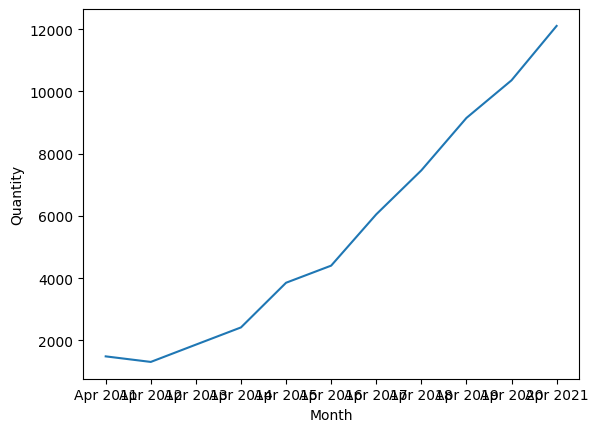

In [20]:
sns.lineplot(x="Month",y='Quantity',data=apr)

<AxesSubplot:xlabel='Month', ylabel='Quantity-E'>

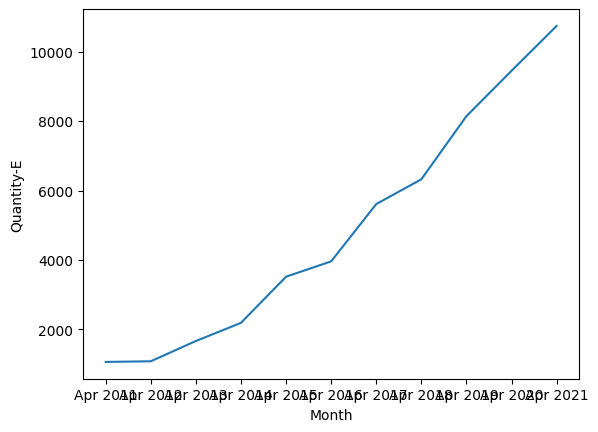

In [21]:
sns.lineplot(x="Month",y='Quantity-E',data=apr)

In [22]:
#without substracting re exports

In [23]:
#calculate growth rate for individual months
# create a new column for the growth rates
apr['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(apr)):
    # calculate the growth rate
    growth_rate = (apr.loc[i, 'Quantity'] - apr.loc[i-1, 'Quantity']) / apr.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    apr.loc[i, 'Growth Rate'] = growth_rate


In [24]:
apr['Growth Rate']

0     0.000000
1    -0.120024
2     0.424471
3     0.296999
4     0.593862
5     0.142708
6     0.374347
7     0.233574
8     0.225687
9     0.132239
10    0.168730
Name: Growth Rate, dtype: float64

In [25]:
#plot the growth rates

In [26]:
#calculate the average growth rates

In [27]:
#lets make a trend variable

In [28]:
length=len(apr)
trend = [i for i in range(1, length+1)]
apr['trend'] = trend


In [29]:
#log of Quantity
apr["l_Quantity"]=apr['Quantity'].apply(np.log)

In [30]:
apr.head(11)

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,Growth Rate,trend,l_Quantity
0,Apr 2011,3087.522066,0.519112,0.480888,0.0,0.0,0.0,0.0,5920215.0,1486.782,...,1066.306,12290.771117,7701.593044,4695.846185,12186.785930,9962.491688,4265.881186,0.000000,1,7.304369
1,Apr 2012,2838.021295,0.553451,0.446549,0.0,0.0,0.0,0.0,7547585.0,1308.333,...,1085.164,11409.198246,9089.725877,5809.180609,11262.088549,7493.641964,5492.960924,-0.120024,2,7.176509
2,Apr 2013,3153.614624,0.569745,0.430255,0.0,0.0,0.0,0.0,10918922.0,1863.682,...,1668.309,13866.696184,10582.188585,5809.180609,11363.528667,7641.355733,6004.134884,0.424471,3,7.530309
3,Apr 2014,4060.726100,0.486858,0.513142,0.0,0.0,0.0,0.0,23210420.0,2417.193,...,2191.436,14942.771187,8711.258517,4717.892411,14146.441386,7575.600950,7217.828931,0.296999,4,7.790362
4,Apr 2015,3977.997791,0.535389,0.464611,0.0,0.0,0.0,0.0,37590528.0,3852.672,...,3519.836,8874.624317,6003.421223,4387.199017,9762.338525,7112.089908,7432.263141,0.593862,5,8.256522
5,Apr 2016,3075.791532,0.664403,0.335597,0.0,0.0,0.0,0.0,40111380.0,4402.481,...,3961.059,16652.987927,10837.008602,4122.644303,19617.554306,11090.791990,5825.151264,0.142708,6,8.389924
6,Apr 2017,3161.521694,0.671559,0.328441,0.0,0.0,0.0,0.0,52966006.0,6050.537,...,5610.929,11129.648179,9477.326471,5831.226835,10506.589884,7044.571383,6165.794171,0.374347,7,8.707902
7,Apr 2018,3343.179909,0.620207,0.379793,0.0,0.0,0.0,0.0,52880743.0,7463.784,...,6323.559,9801.265442,8086.803187,5158.816935,9002.098833,7891.280740,5248.499301,0.233574,8,8.917818
8,Apr 2019,4731.236800,0.483097,0.516903,0.0,0.0,0.0,0.0,58633741.0,9148.265,...,8141.864,8332.560883,8062.754525,6062.712210,9721.701932,9682.569057,5544.507927,0.225687,9,9.121320
9,Apr 2020,4445.359198,0.561742,0.438258,0.0,0.0,0.0,0.0,55836531.0,10358.022,...,9447.088,6242.388195,4895.890635,5709.972591,7483.673793,6748.004957,4921.811010,0.132239,10,9.245517


In [47]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=apr).fit(intercept=False)

In [48]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     354.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.55e-08
Time:                        21:18:12   Log-Likelihood:                 7.6941
No. Observations:                  11   AIC:                            -11.39
Df Residuals:                       9   BIC:                            -10.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9180      0.086     80.488      0.0

[Regression](https://hope.edu/offices/frost-research-center/institutional-research/resources/hope-facts-data/social-science-division-study/Data%20-%20Growth%20Rates.pdf)

In [49]:
#the average annual growth rate is 
np.exp(0.2386)-1

0.26947064675394095

In [34]:
#regression shows that average growth rate is 26.94 percentage
#counter factual growth rates and counterfactual amounts
#high growth years from Apr 2017 to Apr 2021
#creating dummies for high growth and low growth years
#less than 5000 tons low growth yearsa

apr['Time']=pd.to_datetime(apr['Month'])
apr['growth'] = np.where((apr['Time'] >= '2017-04-01') & (apr['Time'] <= '2021-04-01'), 'high', 'non-high')
dummies = pd.get_dummies(apr['growth'])
apr = apr.join(dummies)




In [35]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
apr['dt1'] = 0
apr['dt2'] = 0

# Set values for dt1
apr.loc[apr['Time'] <= '2016-04', 'dt1'] = apr[apr['Time'] <= '2016-04'].reset_index().index + 1

# Set values for dt2
apr.loc[apr['Time'] > '2016-04', 'dt2'] = apr[apr['Time'] > '2016-04'].reset_index().index + 7



In [36]:
apr.head(11)

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,$/mt_Va_I,Growth Rate,trend,l_Quantity,Time,growth,high,non-high,dt1,dt2
0,Apr 2011,3087.522066,0.519112,0.480888,0.0,0.0,0.0,0.0,5920215.0,1486.782,...,4265.881186,0.000000,1,7.304369,2011-04-01,non-high,0,1,1,0
1,Apr 2012,2838.021295,0.553451,0.446549,0.0,0.0,0.0,0.0,7547585.0,1308.333,...,5492.960924,-0.120024,2,7.176509,2012-04-01,non-high,0,1,2,0
2,Apr 2013,3153.614624,0.569745,0.430255,0.0,0.0,0.0,0.0,10918922.0,1863.682,...,6004.134884,0.424471,3,7.530309,2013-04-01,non-high,0,1,3,0
3,Apr 2014,4060.726100,0.486858,0.513142,0.0,0.0,0.0,0.0,23210420.0,2417.193,...,7217.828931,0.296999,4,7.790362,2014-04-01,non-high,0,1,4,0
4,Apr 2015,3977.997791,0.535389,0.464611,0.0,0.0,0.0,0.0,37590528.0,3852.672,...,7432.263141,0.593862,5,8.256522,2015-04-01,non-high,0,1,5,0
5,Apr 2016,3075.791532,0.664403,0.335597,0.0,0.0,0.0,0.0,40111380.0,4402.481,...,5825.151264,0.142708,6,8.389924,2016-04-01,non-high,0,1,6,0
6,Apr 2017,3161.521694,0.671559,0.328441,0.0,0.0,0.0,0.0,52966006.0,6050.537,...,6165.794171,0.374347,7,8.707902,2017-04-01,high,1,0,0,7
7,Apr 2018,3343.179909,0.620207,0.379793,0.0,0.0,0.0,0.0,52880743.0,7463.784,...,5248.499301,0.233574,8,8.917818,2018-04-01,high,1,0,0,8
8,Apr 2019,4731.236800,0.483097,0.516903,0.0,0.0,0.0,0.0,58633741.0,9148.265,...,5544.507927,0.225687,9,9.121320,2019-04-01,high,1,0,0,9
9,Apr 2020,4445.359198,0.561742,0.438258,0.0,0.0,0.0,0.0,55836531.0,10358.022,...,4921.811010,0.132239,10,9.245517,2020-04-01,high,1,0,0,10


In [37]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
apr['high'] = apr['high'].astype('category')
apr['non-high'] = apr['non-high'].astype('category')


In [38]:
apr.rename(columns={'non-high':'nonhigh'},inplace=True)

In [39]:
apr.dtypes

Month                            object
Production                      float64
CALIFORNIA                      float64
GEORGIA                         float64
MICHIGAN                        float64
NEW JERSEY                      float64
NORTH CAROLINA                  float64
OREGON AND WASHINGTON           float64
C_Value                         float64
Quantity                        float64
C_Value-E                       float64
Quantity-E                      float64
$/mt_TM_D                       float64
$/mt_SP_D                       float64
$/mt_FM_D                       float64
$/mt_TM_I                       float64
$/mt_SP_I                       float64
$/mt_Va_I                       float64
Growth Rate                     float64
trend                             int64
l_Quantity                      float64
Time                     datetime64[ns]
growth                           object
high                           category
nonhigh                        category


In [40]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=apr).fit()

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     137.0
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.40e-06
Time:                        21:14:52   Log-Likelihood:                 9.8489
No. Observations:                  11   AIC:                            -11.70
Df Residuals:                       7   BIC:                            -10.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          3.4243      0.058     59.376   

In [42]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh',data=apr).fit(fit_intercept=False)

In [43]:
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     137.0
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.40e-06
Time:                        21:14:57   Log-Likelihood:                 9.8489
No. Observations:                  11   AIC:                            -11.70
Df Residuals:                       7   BIC:                            -10.11
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.7947      0.125     38.345   

In [44]:
np.exp(0.2551)-1

0.29059067348750034

In [45]:
np.exp(0.1715)-1

0.1870841427322878

In [46]:
0.29-0.18

0.10999999999999999

In [50]:
#the difference between growth rate in high growth years and the average growth rate
apr['C_rate']=apr['Growth Rate'].apply(lambda x:x if x<0.26 else x-(0.26947064675394095-0.1870841427322878))
#mkt1['C_rate']=mkt1['Growth rate'].apply(lambda x:x if x<10.4176 else x-(10.4716))

In [51]:
#counterfactual amount

In [52]:
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
apr["C_amount"] = calculate_c_amount(apr['Quantity'], apr['C_rate'])

In [48]:
# create a new column in the dataframe with all null values
#apr['C_amount'] = None

# iterate over the rows of the dataframe
#for i in range(1, len(apr)):
    # calculate the C_amount using the previous row's Quantity and C_rate
    #C_amount = (1 + apr.loc[i, 'C_rate']) * apr.loc[i-1, 'Quantity']
    # assign the C_amount to the new column
    #apr.loc[i, 'C_amount'] = C_amount
#apr.loc[0, 'C_amount'] = apr.loc[0, 'Quantity']

In [53]:
apr[['Growth Rate','C_rate','Quantity','C_amount']]

,Growth Rate,C_rate,Quantity,C_amount
0,0.000000,0.000000,1486.782,1486.782000
1,-0.120024,-0.120024,1308.333,1308.333000
2,0.424471,0.342084,1863.682,1755.893018
3,0.296999,0.214612,2417.193,2132.728951
4,0.593862,0.511475,3852.672,3223.567488
5,0.142708,0.142708,4402.481,3683.597933
6,0.374347,0.291961,6050.537,4759.063385
7,0.233574,0.233574,7463.784,5870.655968
8,0.225687,0.225687,9148.265,7195.588259
9,0.132239,0.132239,10358.022,8147.125328


In [54]:
apr.columns

Index(['Month', 'Production', 'CALIFORNIA', 'GEORGIA', 'MICHIGAN',
       'NEW JERSEY', 'NORTH CAROLINA', 'OREGON AND WASHINGTON', 'C_Value',
       'Quantity', 'C_Value-E', 'Quantity-E', '$/mt_TM_D', '$/mt_SP_D',
       '$/mt_FM_D', '$/mt_TM_I', '$/mt_SP_I', '$/mt_Va_I', 'Growth Rate',
       'trend', 'l_Quantity', 'Time', 'growth', 'high', 'nonhigh', 'dt1',
       'dt2', 'C_rate', 'C_amount'],
      dtype='object')

In [55]:
#growth rate of Quantity less exports

In [56]:
#calculate growth rate for individual months
# create a new column for the growth rates
apr['Growth Rate2'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(apr)):
    # calculate the growth rate
    growth_rate2 = (apr.loc[i, 'Quantity-E'] - apr.loc[i-1, 'Quantity-E']) / apr.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    apr.loc[i, 'Growth Rate2'] = growth_rate2


In [57]:
apr['Growth Rate2']

0     0.000000
1     0.017685
2     0.537380
3     0.313567
4     0.606178
5     0.125353
6     0.416522
7     0.127007
8     0.287545
9     0.160310
10    0.136811
Name: Growth Rate2, dtype: float64

In [58]:
#plot the growth rates

In [59]:
#log of Quantity-E
apr["l_QE"]=apr['Quantity-E'].apply(np.log)

In [62]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=apr).fit(intercept=False)

In [58]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     371.5
Date:                Mon, 16 Jan 2023   Prob (F-statistic):           1.26e-08
Time:                        20:14:52   Log-Likelihood:                 7.4206
No. Observations:                  11   AIC:                            -10.84
Df Residuals:                       9   BIC:                            -10.05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7110      0.088     76.162      0.0

In [63]:
#the average growth rate is
np.exp(0.2504)-1

0.2845391295901476

In [64]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh-1',data=apr).fit(intercept=False)

In [65]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     248.0
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.81e-07
Time:                        21:23:26   Log-Likelihood:                 12.543
No. Observations:                  11   AIC:                            -17.09
Df Residuals:                       7   BIC:                            -15.49
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          3.2754      0.045     72.554   

In [66]:
np.exp(0.2961)-1

0.34460461057031067

In [67]:
np.exp(0.1700)-1

0.18530485132036545

In [68]:
0.34460461057031067-0.18530485132036545

0.15929975924994522

In [69]:
#counterfactual growuth rate
#the difference between growth rate in average and high growth years
apr['C_rate2']=apr['Growth Rate2'].apply(lambda x:x if x<0.28 else x-(0.2845391295901476-0.185))


In [70]:
#counterfactual amount

In [71]:
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
apr["C_amount2"] = calculate_c_amount(apr['Quantity-E'], apr['C_rate2'])

In [72]:
apr.to_csv('apr_corrected.csv')

## May

In [73]:
may=cd[cd.Month.str.contains('May')]

In [74]:
may.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
44,May 2011,18190.111506,0.352449,0.408121,0.0,0.0,0.239431,0.0,1560360.0,415.422,1346375.0,391.422,6622.332180,5280.654101,4600.312538,8971.364979,6593.496151,3597.060096
45,May 2012,17227.826156,0.364690,0.367811,0.0,0.0,0.267499,0.0,4538068.0,579.681,4398633.0,562.694,8803.348952,6291.948238,5416.022908,9675.888267,4021.341729,7828.570191
46,May 2013,18933.538508,0.379592,0.358321,0.0,0.0,0.262086,0.0,3812484.0,612.115,3699223.0,601.815,9443.754376,6264.398042,5269.048066,10134.028480,6531.336573,4051.390267
47,May 2014,24353.422764,0.324718,0.427811,0.0,0.0,0.247472,0.0,8058751.0,1010.857,7286043.0,927.525,6579.285842,4926.869052,4490.081406,8985.030162,6156.085781,9158.340353
48,May 2015,23787.029329,0.358140,0.388494,0.0,0.0,0.253366,0.0,14346978.0,1499.516,13458418.0,1394.168,6453.033446,4846.050019,4232.875434,8661.986359,5917.164393,5884.947361


In [75]:
may.shape

(11, 18)

In [76]:
#took a slice of the dataframe so dropped the index and reset to new one
may=may.reset_index(drop=True)

In [77]:
#calculate growth rate for individual months
# create a new column for the growth rates
may['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(may)):
    # calculate the growth rate
    growth_rate = (may.loc[i, 'Quantity'] - may.loc[i-1, 'Quantity']) / may.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    may.loc[i, 'Growth Rate'] = growth_rate

In [78]:
may['Growth Rate']

0     0.000000
1     0.395403
2     0.055951
3     0.651417
4     0.483411
5     0.380529
6     0.491372
7     0.308285
8    -0.099038
9     0.123663
10    0.955127
Name: Growth Rate, dtype: float64

In [79]:
#create the trend variables
length=len(may)
trend = [i for i in range(1, length+1)]
may['trend'] = trend


In [80]:
#log of Quantity
may["l_Quantity"]=may['Quantity'].apply(np.log)

In [81]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=may).fit()

In [82]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     243.5
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           8.00e-08
Time:                        21:26:37   Log-Likelihood:                 3.6423
No. Observations:                  11   AIC:                            -3.285
Df Residuals:                       9   BIC:                            -2.489
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7865      0.124     46.580      0.0

In [83]:
#average annual growth rate
np.exp(0.2858)-1

0.3308262633813157

In [84]:
#regression shows that average growth rate is 33.08 percentage
#counter factual growth rates and counterfactual amounts
#high growth years from Apr 2017 to Apr 2021
#creating dummies for high growth and low growth years


may['Time']=pd.to_datetime(may['Month'])
may['growth'] = np.where((may['Time'] >= '2017-05-01') & (may['Time'] <= '2021-05-01'), 'high', 'non-high')
dummies = pd.get_dummies(may['growth'])
may = may.join(dummies)

In [85]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
may['dt1'] = 0
may['dt2'] = 0

# Set values for dt1
may.loc[may['Time'] <= '2016-05', 'dt1'] = may[may['Time'] <= '2016-05'].reset_index().index + 1

# Set values for dt2
may.loc[may['Time'] > '2016-05', 'dt2'] = may[may['Time'] > '2016-05'].reset_index().index + 7



In [86]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
may['high'] = may['high'].astype('category')
may['non-high'] = may['non-high'].astype('category')

In [87]:
may.rename(columns={'non-high':'nonhigh'},inplace=True)

In [88]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=may).fit()

In [89]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     98.68
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.32e-06
Time:                        21:26:52   Log-Likelihood:                 6.0279
No. Observations:                  11   AIC:                            -4.056
Df Residuals:                       7   BIC:                            -2.464
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          2.8205      0.082     34.554   

In [90]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh',data=may).fit()

In [91]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     98.68
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.32e-06
Time:                        21:26:57   Log-Likelihood:                 6.0279
No. Observations:                  11   AIC:                            -4.056
Df Residuals:                       7   BIC:                            -2.464
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0951      0.177     23.140   

In [363]:
np.exp(0.3252)-1

0.384307479792406

In [364]:
np.exp(0.1915)-1

0.2110648331399927

In [ ]:
0.3308262633813157

In [365]:
0.384307479792406-0.2110648331399927

0.1732426466524133

In [366]:
0.33029403932787016-0.3005665796227339

0.02972745970513624

In [92]:
#counterfactual growuth rate
#the difference between growth rate in high growth years and average growth from 2011 to 2021
may['C_rate']=may['Growth Rate'].apply(lambda x:x if x<0.330 else x-(0.3308262633813157-0.21106))


In [93]:
#counterfactual amount

In [94]:
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
may["C_amount"] = calculate_c_amount(may['Quantity'], may['C_rate'])

In [95]:
#for quantity less exports


In [96]:
#calculate growth rate for individual months
# create a new column for the growth rates
may['Growth Rate2'] = 0
#fpr 
# iterate over the rows of the dataframe
for i in range(1, len(may)):
    # calculate the growth rate
    growth_rate2 = (may.loc[i, 'Quantity-E'] - may.loc[i-1, 'Quantity-E']) / may.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    may.loc[i, 'Growth Rate2'] = growth_rate2

In [97]:
may['Growth Rate2']

0     0.000000
1     0.437564
2     0.069524
3     0.541213
4     0.503106
5     0.397216
6     0.425494
7     0.324856
8    -0.127856
9     0.114074
10    0.872969
Name: Growth Rate2, dtype: float64

In [98]:
#plot the growth rates

In [99]:
#log of Quantity-E
may["l_QE"]=may['Quantity-E'].apply(np.log)

In [100]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=may
                         ).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     221.2
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.21e-07
Time:                        21:28:37   Log-Likelihood:                 3.6096
No. Observations:                  11   AIC:                            -3.219
Df Residuals:                       9   BIC:                            -2.423
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.7744      0.125     46.345      0.0

In [101]:
#the average growth rate is
np.exp(0.2732)-1

0.314163051153461

In [102]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh',data=may).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     99.32
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.23e-06
Time:                        21:28:41   Log-Likelihood:                 6.5379
No. Observations:                  11   AIC:                            -5.076
Df Residuals:                       7   BIC:                            -3.484
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.0965      0.169     24.246   

In [103]:
np.exp(0.3194)-1

0.37630173551078405

In [104]:
np.exp(0.17317)-1

0.1890682295019852

In [381]:
-0.127856<0.3141

True

In [382]:
0.3763-0.189068

0.187232

In [383]:
may.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,Time,growth,high,nonhigh,dt1,dt2,C_rate,C_amount,Growth Rate2,l_QE
0,May 2011,20092.977317,0.352449,0.408121,0.0,0.0,0.239431,0.0,1560360.0,415.422,...,2011-05-01,non-high,0,1,1,0,0.000000,415.422000,0.000000,5.969786
1,May 2012,18932.782421,0.364690,0.367811,0.0,0.0,0.267499,0.0,4538068.0,579.681,...,2012-05-01,non-high,0,1,2,0,0.222153,507.709138,0.437564,6.332736
2,May 2013,20692.626456,0.379592,0.358321,0.0,0.0,0.262086,0.0,3812484.0,612.115,...,2013-05-01,non-high,0,1,3,0,0.055951,536.116208,0.069524,6.399950
3,May 2014,26109.266365,0.324718,0.427811,0.0,0.0,0.247472,0.0,8058751.0,1010.857,...,2014-05-01,non-high,0,1,4,0,0.478167,792.469184,0.541213,6.832520
4,May 2015,25462.843673,0.358140,0.388494,0.0,0.0,0.253366,0.0,14346978.0,1499.516,...,2015-05-01,non-high,0,1,5,0,0.310161,1038.261910,0.503106,7.240053


In [105]:
#counterfactual growuth rate
#the difference between growth rate in high growth years and average growth from 2011 to 2021
may['C_rate2']=may['Growth Rate2'].apply(lambda x:x if x<0.3141 else x-(0.314163051153461-0.1890682295019852))
#mkt1['C_rate']=mkt1['Growth rate'].apply(lambda x:x if x<10.4176 else x-(10.4716))

In [106]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
may["C_amount2"] = calculate_c_amount(may['Quantity-E'], may['C_rate2'])

In [107]:
may.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,high,nonhigh,dt1,dt2,C_rate,C_amount,Growth Rate2,l_QE,C_rate2,C_amount2
0,May 2011,18190.111506,0.352449,0.408121,0.0,0.0,0.239431,0.0,1560360.0,415.422,...,0,1,1,0,0.000000,415.422000,0.000000,5.969786,0.000000,391.422000
1,May 2012,17227.826156,0.364690,0.367811,0.0,0.0,0.267499,0.0,4538068.0,579.681,...,0,1,2,0,0.275636,529.927459,0.437564,6.332736,0.312469,513.729135
2,May 2013,18933.538508,0.379592,0.358321,0.0,0.0,0.262086,0.0,3812484.0,612.115,...,0,1,3,0,0.055951,559.577676,0.069524,6.399950,0.069524,549.445879
3,May 2014,24353.422764,0.324718,0.427811,0.0,0.0,0.247472,0.0,8058751.0,1010.857,...,0,1,4,0,0.531651,857.077453,0.541213,6.832520,0.416118,778.080204
4,May 2015,23787.029329,0.358140,0.388494,0.0,0.0,0.253366,0.0,14346978.0,1499.516,...,0,1,5,0,0.363644,1168.748824,0.503106,7.240053,0.378011,1072.202889


In [108]:
may[['Month','Growth Rate','Quantity','C_rate','C_amount']]

,Month,Growth Rate,Quantity,C_rate,C_amount
0,May 2011,0.000000,415.422,0.000000,415.422000
1,May 2012,0.395403,579.681,0.275636,529.927459
2,May 2013,0.055951,612.115,0.055951,559.577676
3,May 2014,0.651417,1010.857,0.531651,857.077453
4,May 2015,0.483411,1499.516,0.363644,1168.748824
5,May 2016,0.380529,2070.126,0.260763,1473.515492
6,May 2017,0.491372,3087.327,0.371605,2021.081624
7,May 2018,0.308285,4039.104,0.308285,2644.151032
8,May 2019,-0.099038,3639.080,-0.099038,2382.280114
9,May 2020,0.123663,4089.101,0.123663,2676.880969


In [109]:
#may dataset

In [110]:
may.to_csv('may_corrected.csv')

# June

In [111]:
june=cd[cd.Month.str.contains('Jun')]

In [112]:
#shape

In [113]:
june.shape

(11, 18)

In [114]:
#growth rate calculation

In [115]:
#took a slice of the dataframe so dropped the index and reset to new one
june=june.reset_index(drop=True)

In [116]:
#calculate growth rate for individual months
# create a new column for the growth rates
june['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(june)):
    # calculate the growth rate
    growth_rate = (june.loc[i, 'Quantity'] - june.loc[i-1, 'Quantity']) / june.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    june.loc[i, 'Growth Rate'] = growth_rate

In [117]:
june['Growth Rate']

0     0.000000
1     0.911596
2     0.240912
3     0.342978
4     8.263450
5     0.056817
6    -0.773960
7     0.212742
8     0.060234
9     0.355721
10    0.374606
Name: Growth Rate, dtype: float64

In [118]:
june['Quantity']

0      119.813
1      229.034
2      284.211
3      381.689
4     3535.757
5     3736.649
6      844.632
7     1024.321
8     1086.020
9     1472.340
10    2023.887
Name: Quantity, dtype: float64

In [119]:
#double checked with the trade online data 
#the values are correct

In [120]:
#create the trend variables
length=len(june)
trend = [i for i in range(1, length+1)]
june['trend'] = trend

In [121]:
#log of Quantity
june["l_Quantity"]=june['Quantity'].apply(np.log)

In [122]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=june).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.430
Method:                 Least Squares   F-statistic:                     8.543
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0170
Time:                        21:30:29   Log-Likelihood:                -12.753
No. Observations:                  11   AIC:                             29.51
Df Residuals:                       9   BIC:                             30.30
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2813      0.551      9.577      0.0

In [123]:
#average annual growth rate
np.exp(0.2376)-1

0.2682018106309847

In [124]:
#counter factual growth rates and counterfactual amounts
#low growth years from June 2011 to June 2016
#creating dummies for high growth and low growth years


june['Time']=pd.to_datetime(june['Month'])
june['growth'] = np.where((june['Time'] >= '2016-06-01') & (june['Time'] <= '2021-06-01'), 'high', 'non-high')
dummies = pd.get_dummies(june['growth'])
june = june.join(dummies)

In [125]:
june.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,Growth Rate,trend,l_Quantity,Time,growth,high,non-high
0,Jun 2011,29245.800877,0.219214,0.203072,0.022130,0.244728,0.223379,0.087477,423007.0,119.813,...,7905.146830,4529.309115,3530.564322,0.000000,1,4.785932,2011-06-01,non-high,0,1
1,Jun 2012,28288.044464,0.222102,0.179202,0.022400,0.233505,0.244366,0.098425,1548299.0,229.034,...,6287.628255,6073.904120,6760.135357,0.911596,2,5.433870,2012-06-01,non-high,0,1
2,Jun 2013,31416.629088,0.228765,0.172757,0.030849,0.249757,0.236923,0.080949,1369394.0,284.211,...,7150.889278,9797.946903,4361.696307,0.240912,3,5.649717,2013-06-01,non-high,0,1
3,Jun 2014,36931.939141,0.214123,0.225683,0.026040,0.215701,0.244780,0.073673,2402210.0,381.689,...,6850.614272,5144.694683,6293.639211,0.342978,4,5.944606,2014-06-01,non-high,0,1
4,Jun 2015,35033.065971,0.243173,0.211026,0.024085,0.193135,0.258048,0.070533,15255459.0,3535.757,...,6327.155580,4608.428623,6559.702796,8.263450,5,8.170683,2015-06-01,non-high,0,1


In [126]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
june['dt1'] = 0
june['dt2'] = 0

# Set values for dt1
june.loc[june['Time'] <= '2016-06', 'dt1'] = june[june['Time'] <= '2016-06'].reset_index().index + 1

# Set values for dt2
june.loc[june['Time'] > '2016-06', 'dt2'] = june[june['Time'] > '2016-06'].reset_index().index + 7


In [127]:
june.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,$/mt_Va_I,Growth Rate,trend,l_Quantity,Time,growth,high,non-high,dt1,dt2
0,Jun 2011,29245.800877,0.219214,0.203072,0.022130,0.244728,0.223379,0.087477,423007.0,119.813,...,3530.564322,0.000000,1,4.785932,2011-06-01,non-high,0,1,1,0
1,Jun 2012,28288.044464,0.222102,0.179202,0.022400,0.233505,0.244366,0.098425,1548299.0,229.034,...,6760.135357,0.911596,2,5.433870,2012-06-01,non-high,0,1,2,0
2,Jun 2013,31416.629088,0.228765,0.172757,0.030849,0.249757,0.236923,0.080949,1369394.0,284.211,...,4361.696307,0.240912,3,5.649717,2013-06-01,non-high,0,1,3,0
3,Jun 2014,36931.939141,0.214123,0.225683,0.026040,0.215701,0.244780,0.073673,2402210.0,381.689,...,6293.639211,0.342978,4,5.944606,2014-06-01,non-high,0,1,4,0
4,Jun 2015,35033.065971,0.243173,0.211026,0.024085,0.193135,0.258048,0.070533,15255459.0,3535.757,...,6559.702796,8.263450,5,8.170683,2015-06-01,non-high,0,1,5,0


In [128]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
june['high'] = june['high'].astype('category')
june['non-high'] = june['non-high'].astype('category')

In [129]:
june.rename(columns={'non-high':'nonhigh'},inplace=True)

In [130]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=june).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     17.52
Date:                Mon, 03 Apr 2023   Prob (F-statistic):            0.00124
Time:                        21:30:44   Log-Likelihood:                -4.6486
No. Observations:                  11   AIC:                             17.30
Df Residuals:                       7   BIC:                             18.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          2.0011      0.213      9.385   

In [144]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh',data=june).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     17.52
Date:                Mon, 16 Jan 2023   Prob (F-statistic):            0.00124
Time:                        20:49:15   Log-Likelihood:                -4.6486
No. Observations:                  11   AIC:                             17.30
Df Residuals:                       7   BIC:                             18.89
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.7812      0.382      7.284   

In [131]:
np.exp(0.6649)-1

0.944296082006826

In [132]:
np.exp(0.3057)-1

0.3575749729590214

In [133]:
0.944296082006826-0.3575749729590214

0.5867211090478046

In [134]:
#this is not feasible

In [135]:
#just substract the difference of average annual growth rates and the growth rate of high imports years

In [136]:
#counterfactual growuth rate
#the difference between growth rate in high growth years and average growth from 2011 to 2021
june['C_rate']=june['Growth Rate'].apply(lambda x:x if x<0.268 else x-(0.3575-0.268))


In [137]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
june["C_amount"] = calculate_c_amount(june['Quantity'], june['C_rate'])

In [138]:
#growth rate of Quantity less exports

In [139]:
#calculate growth rate for individual months
# create a new column for the growth rates
june['Growth Rate2'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(june)):
    # calculate the growth rate
    growth_rate2 = (june.loc[i, 'Quantity-E'] - june.loc[i-1, 'Quantity-E']) / june.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    june.loc[i, 'Growth Rate2'] = growth_rate2

In [140]:
june['Growth Rate2']

0     0.000000
1     1.082228
2     0.261053
3     0.302591
4     9.161636
5     0.064700
6    -0.813457
7     0.389066
8     0.082366
9     0.261815
10    0.368103
Name: Growth Rate2, dtype: float64

In [141]:
#log of Quantity-E
june["l_QE"]=june['Quantity-E'].apply(np.log)

In [142]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=june).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.466
Model:                            OLS   Adj. R-squared:                  0.406
Method:                 Least Squares   F-statistic:                     7.840
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0207
Time:                        21:31:30   Log-Likelihood:                -13.313
No. Observations:                  11   AIC:                             30.63
Df Residuals:                       9   BIC:                             31.42
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1802      0.580      8.927      0.0

In [143]:
#the average annula growth rate is 
np.exp(0.2396)-1

0.2707407523476495

In [144]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh-1',data=june).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     17.78
Date:                Mon, 03 Apr 2023   Prob (F-statistic):            0.00118
Time:                        21:31:31   Log-Likelihood:                -4.9116
No. Observations:                  11   AIC:                             17.82
Df Residuals:                       7   BIC:                             19.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          1.9079      0.218      8.737   

In [145]:
np.exp(0.6967)-1

1.0071182763678883

In [146]:
np.exp(0.3158)-1

0.3713559570056939

In [147]:
#counterfactual growuth rate
#the difference between growth rate in high growth years and average growth from 2011 to 2021
june['C_rate2']=june['Growth Rate2'].apply(lambda x:x if x<0.28 else x-(0.3714-0.2707))


In [148]:
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
june["C_amount2"] = calculate_c_amount(june['Quantity-E'], june['C_rate2'])

In [149]:
june.to_csv('june_corrected.csv')

# JULY

In [150]:
july=cd[cd.Month.str.contains('Jul')]

In [151]:
july.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
22,Jul 2011,27254.710815,0.058807,0.0,0.237463,0.328258,0.0,0.375471,9394491.0,2100.100,9340161.0,2091.650,6310.508955,5483.035961,4648.997954,8132.052021,4572.544819,4913.411727
23,Jul 2012,27301.073594,0.057533,0.0,0.232100,0.302434,0.0,0.407934,23617198.0,5610.268,23561108.0,5599.231,5519.511718,6206.278985,4781.275311,5524.993821,5328.506213,3520.234526
24,Jul 2013,31469.295864,0.057096,0.0,0.307978,0.311673,0.0,0.323253,37974470.0,10762.108,37773340.0,10690.246,4318.235575,4633.439459,4012.413172,4050.428365,6496.647501,4137.757272
25,Jul 2014,32435.518856,0.060952,0.0,0.296503,0.307004,0.0,0.335542,40509854.0,11838.335,40150831.0,11764.678,4677.544163,4518.693292,4197.050316,4271.010952,5367.581761,5191.128999
26,Jul 2015,28908.922180,0.073672,0.0,0.291866,0.292561,0.0,0.341901,40375674.0,13236.005,40166905.0,13205.848,4500.163885,4370.335447,3918.716710,4688.441770,4617.528859,5796.197403


In [152]:
july.shape

(11, 18)

In [153]:
#took a slice of the dataframe so dropped the index and reset to new one
july=july.reset_index(drop=True)

In [154]:
july.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
0,Jul 2011,27254.710815,0.058807,0.0,0.237463,0.328258,0.0,0.375471,9394491.0,2100.100,9340161.0,2091.650,6310.508955,5483.035961,4648.997954,8132.052021,4572.544819,4913.411727
1,Jul 2012,27301.073594,0.057533,0.0,0.232100,0.302434,0.0,0.407934,23617198.0,5610.268,23561108.0,5599.231,5519.511718,6206.278985,4781.275311,5524.993821,5328.506213,3520.234526
2,Jul 2013,31469.295864,0.057096,0.0,0.307978,0.311673,0.0,0.323253,37974470.0,10762.108,37773340.0,10690.246,4318.235575,4633.439459,4012.413172,4050.428365,6496.647501,4137.757272
3,Jul 2014,32435.518856,0.060952,0.0,0.296503,0.307004,0.0,0.335542,40509854.0,11838.335,40150831.0,11764.678,4677.544163,4518.693292,4197.050316,4271.010952,5367.581761,5191.128999
4,Jul 2015,28908.922180,0.073672,0.0,0.291866,0.292561,0.0,0.341901,40375674.0,13236.005,40166905.0,13205.848,4500.163885,4370.335447,3918.716710,4688.441770,4617.528859,5796.197403


In [155]:
#calculate growth rate for individual months
# create a new column for the growth rates
july['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(may)):
    # calculate the growth rate
    growth_rate = (july.loc[i, 'Quantity'] - july.loc[i-1, 'Quantity']) / july.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    july.loc[i, 'Growth Rate'] = growth_rate

In [156]:
july['Growth Rate']

0     0.000000
1     1.671429
2     0.918288
3     0.100002
4     0.118063
5    -0.151772
6    -0.035616
7    -0.163027
8     0.560728
9    -0.412794
10    0.206685
Name: Growth Rate, dtype: float64

In [157]:
#create the trend variables
length=len(july)
trend = [i for i in range(1, length+1)]
july['trend'] = trend

In [158]:
#log of Quantity
july["l_Quantity"]=july['Quantity'].apply(np.log)

In [159]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=july).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.201
Method:                 Least Squares   F-statistic:                     3.519
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0934
Time:                        21:32:06   Log-Likelihood:                -6.4587
No. Observations:                  11   AIC:                             16.92
Df Residuals:                       9   BIC:                             17.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5707      0.311     27.542      0.0

In [160]:
#average annual growth rate
np.exp(0.0861)-1

0.08991531438717248

In [161]:
#high growth years from 2017 to 2021
july['Time']=pd.to_datetime(july['Month'])
july['growth'] = np.where((july['Time'] >= '2017-07-01') & (july['Time'] <= '2021-07-01'), 'high', 'non-high')
dummies = pd.get_dummies(july['growth'])
july = july.join(dummies)

In [162]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
july['dt1'] = 0
july['dt2'] = 0

# Set values for dt1
july.loc[july['Time'] <= '2016-07', 'dt1'] = july[july['Time'] <= '2016-07'].reset_index().index + 1

# Set values for dt2
july.loc[july['Time'] > '2016-07', 'dt2'] = july[july['Time'] > '2016-07'].reset_index().index + 7

In [163]:
july.head(11)

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,$/mt_Va_I,Growth Rate,trend,l_Quantity,Time,growth,high,non-high,dt1,dt2
0,Jul 2011,27254.710815,0.058807,0.0,0.237463,0.328258,0.0,0.375471,9394491.0,2100.100,...,4913.411727,0.000000,1,7.649740,2011-07-01,non-high,0,1,1,0
1,Jul 2012,27301.073594,0.057533,0.0,0.232100,0.302434,0.0,0.407934,23617198.0,5610.268,...,3520.234526,1.671429,2,8.632354,2012-07-01,non-high,0,1,2,0
2,Jul 2013,31469.295864,0.057096,0.0,0.307978,0.311673,0.0,0.323253,37974470.0,10762.108,...,4137.757272,0.918288,3,9.283787,2013-07-01,non-high,0,1,3,0
3,Jul 2014,32435.518856,0.060952,0.0,0.296503,0.307004,0.0,0.335542,40509854.0,11838.335,...,5191.128999,0.100002,4,9.379098,2014-07-01,non-high,0,1,4,0
4,Jul 2015,28908.922180,0.073672,0.0,0.291866,0.292561,0.0,0.341901,40375674.0,13236.005,...,5796.197403,0.118063,5,9.490696,2015-07-01,non-high,0,1,5,0
5,Jul 2016,33288.965587,0.061389,0.0,0.330243,0.224565,0.0,0.383803,33682840.0,11227.155,...,5197.485509,-0.151772,6,9.326091,2016-07-01,non-high,0,1,6,0
6,Jul 2017,35093.990209,0.060499,0.0,0.309149,0.209079,0.0,0.421273,45339124.0,10827.290,...,4605.710282,-0.035616,7,9.289825,2017-07-01,high,1,0,0,7
7,Jul 2018,32813.808935,0.063189,0.0,0.223834,0.217483,0.0,0.495494,35180737.0,9062.145,...,8085.381884,-0.163027,8,9.111861,2018-07-01,high,1,0,0,8
8,Jul 2019,38512.878034,0.059348,0.0,0.236397,0.198829,0.0,0.505426,51735541.0,14143.539,...,5499.783792,0.560728,9,9.557013,2019-07-01,high,1,0,0,9
9,Jul 2020,36776.938938,0.067900,0.0,0.226045,0.203882,0.0,0.502173,33647948.0,8305.165,...,4882.815929,-0.412794,10,9.024633,2020-07-01,high,1,0,0,10


In [164]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
july['high'] = july['high'].astype('category')
july['non-high'] = july['non-high'].astype('category')

In [165]:
july.rename(columns={'non-high':'nonhigh'},inplace=True)

In [166]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=july).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     4.893
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0385
Time:                        21:32:15   Log-Likelihood:                -2.0560
No. Observations:                  11   AIC:                             12.11
Df Residuals:                       7   BIC:                             13.70
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          3.9275      0.170     23.075   

In [167]:
np.exp(0.3158)-1

0.3713559570056939

In [168]:
np.exp(-0.0242 )-1

-0.023909527859629742

In [169]:
#the logical way to lower the growth rates is substracting the average growth rates
#counterfactual growuth rate
#lower the growth rate by the average growth rate
july['C_rate']=july['Growth Rate'].apply(lambda x:x if x<0.08992 else x-0.08992)

In [170]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
july["C_amount"] = calculate_c_amount(july['Quantity'], july['C_rate'])

In [171]:
#growth rate of Quantity less exports

In [172]:
#calculate growth rate for individual months
# create a new column for the growth rates
july['Growth Rate2'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(july)):
    # calculate the growth rate
    growth_rate2 = (july.loc[i, 'Quantity-E'] - july.loc[i-1, 'Quantity-E']) / july.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    july.loc[i, 'Growth Rate2'] = growth_rate2

In [173]:
july["Growth Rate2"]

0     0.000000
1     1.676945
2     0.909235
3     0.100506
4     0.122500
5    -0.154267
6    -0.033899
7    -0.163662
8     0.560338
9    -0.417841
10    0.210237
Name: Growth Rate2, dtype: float64

In [174]:
#plot the growth rates
#log of Quantity-E
july["l_QE"]=july['Quantity-E'].apply(np.log)

In [175]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=july).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.197
Method:                 Least Squares   F-statistic:                     3.458
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0959
Time:                        21:32:47   Log-Likelihood:                -6.4782
No. Observations:                  11   AIC:                             16.96
Df Residuals:                       9   BIC:                             17.75
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.5686      0.312     27.487      0.0

In [176]:
#the average growth rate is
np.exp(0.0855)-1

0.08926156134406571

In [177]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh',data=july).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     4.875
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0388
Time:                        21:32:50   Log-Likelihood:                -2.0625
No. Observations:                  11   AIC:                             12.12
Df Residuals:                       7   BIC:                             13.72
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        5.7737      0.369     15.636   

In [178]:
np.exp(0.3156)-1

0.3710817132395836

In [179]:
np.exp(-0.0264)-1

-0.026054566490678832

In [180]:
#counterfactual growuth rate
#the difference between growth rate in high growth years and average growth from 2011 to 2021
july['C_rate2']=july['Growth Rate2'].apply(lambda x:x if x<0.08926 else x-0.08926)

In [181]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
july["C_amount2"] = calculate_c_amount(july['Quantity-E'], july['C_rate2'])

In [182]:
july.to_csv('july_corrected.csv')

In [198]:
july.head(
)

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,high,nonhigh,dt1,dt2,C_rate,C_amount,Growth Rate2,l_QE,C_rate2,C_amount2
0,Jul 2011,30105.823485,0.058807,0.0,0.237463,0.328258,0.0,0.375471,9394491.0,2100.100,...,0,1,1,0,0.000000,2100.100000,0.000000,7.645709,0.000000,2091.650000
1,Jul 2012,30002.931394,0.057533,0.0,0.232100,0.302434,0.0,0.407934,23617198.0,5610.268,...,0,1,2,0,1.581509,5421.427008,1.676945,8.630385,1.587685,5412.530321
2,Jul 2013,34393.063075,0.057096,0.0,0.307978,0.311673,0.0,0.323253,37974470.0,10762.108,...,0,1,3,0,0.828368,9912.361935,0.909235,9.277087,0.819975,9850.668133
3,Jul 2014,34774.068914,0.060952,0.0,0.296503,0.307004,0.0,0.335542,40509854.0,11838.335,...,0,1,4,0,0.010082,10012.293464,0.100506,9.372857,0.011246,9961.447028
4,Jul 2015,30945.577779,0.073672,0.0,0.291866,0.292561,0.0,0.341901,40375674.0,13236.005,...,0,1,5,0,0.028143,10294.069993,0.122500,9.488415,0.033240,10292.562941


# August

In [183]:
aug=cd[cd.Month.str.contains('Aug')]

In [184]:
aug.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
11,Aug 2011,17847.476505,0.0,0.0,0.326365,0.100256,0.0,0.573379,42609461.0,9913.745,42285823.0,9848.744,5591.721106,4791.794413,4427.617099,7104.634650,4675.154763,4718.121208
12,Aug 2012,18491.302484,0.0,0.0,0.308411,0.089304,0.0,0.602285,48703469.0,11864.334,48332177.0,11789.794,5549.641400,5180.703005,3971.995090,5741.222898,5710.964560,3381.610659
13,Aug 2013,20856.840782,0.0,0.0,0.418216,0.094052,0.0,0.487732,32685276.0,8750.327,32338339.0,8649.923,4745.077689,4486.371866,3152.610349,6440.187239,6697.962187,6034.397417
14,Aug 2014,21530.541093,0.0,0.0,0.402010,0.092500,0.0,0.505490,35215223.0,10405.103,35055501.0,10365.379,5069.123010,4971.546254,3700.091634,6141.425096,8368.936088,5871.400628
15,Aug 2015,19169.289325,0.0,0.0,0.396143,0.088241,0.0,0.515615,37127892.0,7652.078,36673444.0,7565.013,6191.138640,5428.436359,3586.186132,8568.855946,4894.005167,7368.375855


In [185]:
#took a slice of the dataframe so dropped the index and reset to new one
aug=aug.reset_index(drop=True)

In [186]:
#calculate growth rate for individual months
# create a new column for the growth rates
aug['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(aug)):
    # calculate the growth rate
    growth_rate = (aug.loc[i, 'Quantity'] - aug.loc[i-1, 'Quantity']) / aug.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    aug.loc[i, 'Growth Rate'] = growth_rate

In [187]:
aug["Growth Rate"]

0     0.000000
1     0.196756
2    -0.262468
3     0.189110
4    -0.264584
5    -0.265963
6     0.657617
7     0.078274
8     0.118007
9     0.028065
10    0.104851
Name: Growth Rate, dtype: float64

In [188]:
#create the trend variables
length=len(aug)
trend = [i for i in range(1, length+1)]
aug['trend'] = trend

In [189]:
#log of Quantity
aug["l_Quantity"]=aug['Quantity'].apply(np.log)

In [190]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=aug).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                 -0.035
Method:                 Least Squares   F-statistic:                    0.6621
Date:                Mon, 03 Apr 2023   Prob (F-statistic):              0.437
Time:                        21:33:20   Log-Likelihood:                 1.3562
No. Observations:                  11   AIC:                             1.288
Df Residuals:                       9   BIC:                             2.083
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0692      0.153     59.305      0.0

In [191]:
aug["Growth Rate"].mean()

0.05269690020683781

In [192]:
np.exp(0.0183)-1

0.018468471104626794

In [193]:
#high growth years from 2017 to 2021
aug['Time']=pd.to_datetime(aug['Month'])
aug['growth'] = np.where((aug['Time'] >= '2017-08-01') & (aug['Time'] <= '2021-08-01'), 'high', 'non-high')
dummies = pd.get_dummies(aug['growth'])
aug = aug.join(dummies)

In [194]:
dummies

,high,non-high
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,1,0
7,1,0
8,1,0
9,1,0


In [195]:
aug

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,Growth Rate,trend,l_Quantity,Time,growth,high,non-high
0,Aug 2011,17847.476505,0.0,0.0,0.326365,0.100256,0.0,0.573379,42609461.0,9913.745,...,7104.634650,4675.154763,4718.121208,0.000000,1,9.201677,2011-08-01,non-high,0,1
1,Aug 2012,18491.302484,0.0,0.0,0.308411,0.089304,0.0,0.602285,48703469.0,11864.334,...,5741.222898,5710.964560,3381.610659,0.196756,2,9.381292,2012-08-01,non-high,0,1
2,Aug 2013,20856.840782,0.0,0.0,0.418216,0.094052,0.0,0.487732,32685276.0,8750.327,...,6440.187239,6697.962187,6034.397417,-0.262468,3,9.076846,2013-08-01,non-high,0,1
3,Aug 2014,21530.541093,0.0,0.0,0.402010,0.092500,0.0,0.505490,35215223.0,10405.103,...,6141.425096,8368.936088,5871.400628,0.189110,4,9.250052,2014-08-01,non-high,0,1
4,Aug 2015,19169.289325,0.0,0.0,0.396143,0.088241,0.0,0.515615,37127892.0,7652.078,...,8568.855946,4894.005167,7368.375855,-0.264584,5,8.942733,2015-08-01,non-high,0,1
5,Aug 2016,24165.615931,0.0,0.0,0.409429,0.061869,0.0,0.528701,28409997.0,5616.908,...,8316.660479,6637.658305,6969.778700,-0.265963,6,8.633537,2016-08-01,non-high,0,1
6,Aug 2017,26015.974761,0.0,0.0,0.375321,0.056407,0.0,0.568272,41491740.0,9310.684,...,6097.357248,5044.684404,5803.732391,0.657617,7,9.138918,2017-08-01,high,1,0
7,Aug 2018,24296.697919,0.0,0.0,0.272068,0.058744,0.0,0.669188,46548225.0,10039.471,...,7328.160119,5544.257226,7537.909410,0.078274,8,9.214280,2018-08-01,high,1,0
8,Aug 2019,29190.815333,0.0,0.0,0.280701,0.052465,0.0,0.666834,46749436.0,11224.203,...,6539.504928,5856.303320,5633.939542,0.118007,9,9.325828,2019-08-01,high,1,0
9,Aug 2020,27449.934397,0.0,0.0,0.272566,0.054632,0.0,0.672803,53183131.0,11539.206,...,7246.904119,5965.006571,5587.536576,0.028065,10,9.353506,2020-08-01,high,1,0


In [196]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
aug['Time']=pd.to_datetime(aug['Month'])
aug['growth'] = np.where((aug['Time'] >= '2017-08-01') & (may['Time'] <= '2021-08-01'), 'high', 'non-high')
dummies = pd.get_dummies(aug['growth'])
aug = aug.assign(**dummies)

In [197]:
aug.tail()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,...,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,Growth Rate,trend,l_Quantity,Time,growth,high,non-high
6,Aug 2017,26015.974761,0.0,0.0,0.375321,0.056407,0.0,0.568272,41491740.0,9310.684,...,6097.357248,5044.684404,5803.732391,0.657617,7,9.138918,2017-08-01,high,1,0
7,Aug 2018,24296.697919,0.0,0.0,0.272068,0.058744,0.0,0.669188,46548225.0,10039.471,...,7328.160119,5544.257226,7537.909410,0.078274,8,9.214280,2018-08-01,high,1,0
8,Aug 2019,29190.815333,0.0,0.0,0.280701,0.052465,0.0,0.666834,46749436.0,11224.203,...,6539.504928,5856.303320,5633.939542,0.118007,9,9.325828,2019-08-01,high,1,0
9,Aug 2020,27449.934397,0.0,0.0,0.272566,0.054632,0.0,0.672803,53183131.0,11539.206,...,7246.904119,5965.006571,5587.536576,0.028065,10,9.353506,2020-08-01,high,1,0
10,Aug 2021,28199.516317,0.0,0.0,0.231227,0.045968,0.0,0.722806,62681341.0,12749.105,...,6589.187694,5309.294101,5315.141918,0.104851,11,9.453216,2021-08-01,high,1,0


In [198]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
aug['dt1'] = 0
aug['dt2'] = 0

# Set values for dt1
aug.loc[aug['Time'] <= '2016-08', 'dt1'] = aug[aug['Time'] <= '2016-08'].reset_index().index + 1

# Set values for dt2
aug.loc[aug['Time'] > '2016-08', 'dt2'] = aug[aug['Time'] > '2016-08'].reset_index().index + 7


In [199]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
aug['high'] = aug['high'].astype('category')
aug['non-high'] = aug['non-high'].astype('category')

In [200]:
aug.rename(columns={'non-high':'nonhigh'},inplace=True)

In [201]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=aug).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     7.568
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0134
Time:                        21:33:29   Log-Likelihood:                 8.9156
No. Observations:                  11   AIC:                            -9.831
Df Residuals:                       7   BIC:                            -8.240
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          4.7397      0.063     75.499   

In [202]:
np.exp(0.0768)-1

0.07982608957672332

In [203]:
#1. the average growth rate is 0.018468471104626794
#2. the average growth rate of high growth years is 0.07982608957672332
#counterfactual growuth rate
#x-(2-1)
aug['C_rate']=aug['Growth Rate'].apply(lambda x:x if x<0.018468 else x-(0.07982608957672332-0.018468471104626794))

In [204]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
aug["C_amount"] = calculate_c_amount(aug['Quantity'], aug['C_rate'])

In [205]:
#growth rate of Quantity less exports
#calculate growth rate for individual months
# create a new column for the growth rates
aug['Growth Rate2'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(aug)):
    # calculate the growth rate
    growth_rate2 = (aug.loc[i, 'Quantity-E'] - aug.loc[i-1, 'Quantity-E']) / aug.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    aug.loc[i, 'Growth Rate2'] = growth_rate2

In [206]:
aug["Growth Rate2"]

0     0.000000
1     0.197086
2    -0.266321
3     0.198320
4    -0.270165
5    -0.260813
6     0.642278
7     0.078263
8     0.121416
9     0.032248
10    0.100197
Name: Growth Rate2, dtype: float64

In [207]:
#log of Quantity-E
aug["l_QE"]=aug['Quantity-E'].apply(np.log)

In [208]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=aug).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                 -0.038
Method:                 Least Squares   F-statistic:                    0.6349
Date:                Mon, 03 Apr 2023   Prob (F-statistic):              0.446
Time:                        21:34:54   Log-Likelihood:                 1.3600
No. Observations:                  11   AIC:                             1.280
Df Residuals:                       9   BIC:                             2.076
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.0624      0.153     59.281      0.0

In [209]:
#the average growth rate is
np.exp(0.0180)-1

0.018162976389793695

In [210]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh-1',data=aug).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     7.466
Date:                Mon, 03 Apr 2023   Prob (F-statistic):             0.0138
Time:                        21:35:00   Log-Likelihood:                 8.8774
No. Observations:                  11   AIC:                            -9.755
Df Residuals:                       7   BIC:                            -8.163
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          4.7358      0.063     75.177   

In [211]:
np.exp(0.0781)-1

0.0812307763417437

In [212]:
#counterfactual growuth rate
#same as before (high growth - average growth)
aug['C_rate2']=aug['Growth Rate2'].apply(lambda x:x if x<0.018162 else x-(0.0812307763417437-0.018162976389793695))

In [213]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
aug["C_amount2"] = calculate_c_amount(aug['Quantity-E'], aug['C_rate2'])

In [214]:
aug.to_csv("aug_corrected.csv")

# September

In [215]:
sep=cd[cd.Month.str.contains('Sep')]

In [216]:
sep.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
55,Sep 2011,2558.341342,0.0,0.0,0.0,0.0,0.0,1.0,17919415.0,2587.140,17879162.0,2580.900,9354.869396,7778.559976,5015.516465,8929.114488,6413.050207,8574.714574
56,Sep 2012,2784.256345,0.0,0.0,0.0,0.0,0.0,1.0,25574920.0,4022.081,25455509.0,4012.446,10516.150116,9397.203926,3891.158928,9165.456268,8515.786669,7487.420779
57,Sep 2013,2543.138950,0.0,0.0,0.0,0.0,0.0,1.0,13325657.0,1876.958,12530027.0,1728.018,10789.151355,10489.594435,3020.332992,14784.576699,7059.263356,8819.432680
58,Sep 2014,2720.870538,0.0,0.0,0.0,0.0,0.0,1.0,16070851.0,2148.086,15461636.0,2089.863,12406.307490,9516.620984,3736.835344,12126.716128,9055.902422,11859.343769
59,Sep 2015,2470.994117,0.0,0.0,0.0,0.0,0.0,1.0,16512905.0,1635.829,15571607.0,1516.006,11754.903928,10205.684851,3637.627326,12473.673499,6101.029193,10399.437722


In [217]:
#took a slice of the dataframe so dropped the index and reset to new one
sep=sep.reset_index(drop=True)

In [218]:
#calculate growth rate for individual months
# create a new column for the growth rates
sep['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(sep)):
    # calculate the growth rate
    growth_rate = (sep.loc[i, 'Quantity'] - sep.loc[i-1, 'Quantity']) / sep.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    sep.loc[i, 'Growth Rate'] = growth_rate

0     0.000000
1     0.554644
2    -0.533337
3     0.144451
4    -0.238471
5     0.746115
6     0.320188
7     0.769793
8     0.600767
9     0.417441
10    0.063402
Name: Growth Rate, dtype: float64

In [220]:
#create the trend variables
length=len(sep)
trend = [i for i in range(1, length+1)]
sep['trend'] = trend

In [221]:
#log of Quantity
sep["l_Quantity"]=sep['Quantity'].apply(np.log)

In [222]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=sep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     19.46
Date:                Mon, 03 Apr 2023   Prob (F-statistic):            0.00169
Time:                        21:35:48   Log-Likelihood:                -6.7038
No. Observations:                  11   AIC:                             17.41
Df Residuals:                       9   BIC:                             18.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1541      0.318     22.483      0.0

In [223]:
#average annual growth rate
np.exp(0.2069)-1

0.22985957967328252

In [224]:

sep['Time']=pd.to_datetime(sep['Month'])
sep['growth'] = np.where((sep['Time'] >= '2017-09-01') & (sep['Time'] <= '2021-09-01'), 'high', 'non-high')
dummies = pd.get_dummies(sep['growth'])
sep = sep.join(dummies)

In [225]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
sep['dt1'] = 0
sep['dt2'] = 0

# Set values for dt1
sep.loc[sep['Time'] <= '2016-09', 'dt1'] = sep[sep['Time'] <= '2016-09'].reset_index().index + 1

# Set values for dt2
sep.loc[sep['Time'] > '2016-09', 'dt2'] = sep[sep['Time'] > '2016-09'].reset_index().index + 7


In [226]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
sep['high'] = sep['high'].astype('category')
sep['non-high'] = sep['non-high'].astype('category')

In [227]:
sep.rename(columns={'non-high':'nonhigh'},inplace=True)

In [228]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=sep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     26.50
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           0.000340
Time:                        21:35:56   Log-Likelihood:                0.79256
No. Observations:                  11   AIC:                             6.415
Df Residuals:                       7   BIC:                             8.006
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          3.9972      0.131     30.426   

In [229]:
np.exp(-0.0591)-1

-0.057387496806439176

In [230]:
np.exp(0.3723)-1

0.45106823647255934

In [231]:
#counterfactual growuth rate
#the average growth rate of high growth years minus the average gr from 2011 to 2021
sep['C_rate']=sep['Growth Rate'].apply(lambda x:x if x<0.22985957967328252 else x-(0.45106823647255934-0.22985957967328252))

In [232]:
0.45106823647255934-0.22985957967

0.22120865680255933

In [233]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
sep["C_amount"] = calculate_c_amount(sep['Quantity'], sep['C_rate'])

In [234]:
#growth rate of Quantity less exports

In [235]:
#calculate growth rate for individual months
# create a new column for the growth rates
sep['Growth Rate2'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(sep)):
    # calculate the growth rate
    growth_rate2 = (sep.loc[i, 'Quantity-E'] - sep.loc[i-1, 'Quantity-E']) / sep.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    sep.loc[i, 'Growth Rate2'] = growth_rate2

In [236]:
sep["Growth Rate2"]

0     0.000000
1     0.554669
2    -0.569336
3     0.209399
4    -0.274591
5     0.833102
6     0.297595
7     0.772497
8     0.601319
9     0.403857
10    0.033966
Name: Growth Rate2, dtype: float64

In [237]:
#log of Quantity-E
sep["l_QE"]=sep['Quantity-E'].apply(np.log)

In [238]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=sep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.624
Method:                 Least Squares   F-statistic:                     17.62
Date:                Mon, 03 Apr 2023   Prob (F-statistic):            0.00231
Time:                        21:36:07   Log-Likelihood:                -7.0177
No. Observations:                  11   AIC:                             18.04
Df Residuals:                       9   BIC:                             18.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1360      0.327     21.796      0.0

In [239]:
np.exp(0.2027)-1

0.22470500162977358

In [240]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh-1',data=sep).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     22.08
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           0.000604
Time:                        21:36:09   Log-Likelihood:              -0.069101
No. Observations:                  11   AIC:                             8.138
Df Residuals:                       7   BIC:                             9.730
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          3.9935      0.142     28.108   

In [241]:
np.exp(0.3642)-1

0.43936205778428117

In [242]:
0.43936205778428117-0.224705001

0.21465705678428118

In [243]:
#counterfactual growuth rate
#same as before
sep['C_rate2']=sep['Growth Rate2'].apply(lambda x:x if x<0.22470500162977358 else x-(0.43936205778428117-0.22470500162977358))

In [244]:
#counterfactual amount
sep["C_amount2"] = calculate_c_amount(sep['Quantity-E'], sep['C_rate2'])

In [245]:
sep.to_csv('sep_corrected.csv')

# April to June and July to September

In [246]:
cd.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
0,Apr 2011,3087.522066,0.519112,0.480888,0.0,0.0,0.0,0.0,5920215.0,1486.782,2603786.0,1066.306,12290.771117,7701.593044,4695.846185,12186.785930,9962.491688,4265.881186
1,Apr 2012,2838.021295,0.553451,0.446549,0.0,0.0,0.0,0.0,7547585.0,1308.333,5268584.0,1085.164,11409.198246,9089.725877,5809.180609,11262.088549,7493.641964,5492.960924
2,Apr 2013,3153.614624,0.569745,0.430255,0.0,0.0,0.0,0.0,10918922.0,1863.682,8900557.0,1668.309,13866.696184,10582.188585,5809.180609,11363.528667,7641.355733,6004.134884
3,Apr 2014,4060.726100,0.486858,0.513142,0.0,0.0,0.0,0.0,23210420.0,2417.193,20782030.0,2191.436,14942.771187,8711.258517,4717.892411,14146.441386,7575.600950,7217.828931
4,Apr 2015,3977.997791,0.535389,0.464611,0.0,0.0,0.0,0.0,37590528.0,3852.672,34685861.0,3519.836,8874.624317,6003.421223,4387.199017,9762.338525,7112.089908,7432.263141


In [247]:
cd.columns

Index(['Month', 'Production', 'CALIFORNIA', 'GEORGIA', 'MICHIGAN',
       'NEW JERSEY', 'NORTH CAROLINA', 'OREGON AND WASHINGTON', 'C_Value',
       'Quantity', 'C_Value-E', 'Quantity-E', '$/mt_TM_D', '$/mt_SP_D',
       '$/mt_FM_D', '$/mt_TM_I', '$/mt_SP_I', '$/mt_Va_I'],
      dtype='object')

In [248]:
df=cd.copy()

In [249]:
df.head()

,Month,Production,CALIFORNIA,GEORGIA,MICHIGAN,NEW JERSEY,NORTH CAROLINA,OREGON AND WASHINGTON,C_Value,Quantity,C_Value-E,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I
0,Apr 2011,3087.522066,0.519112,0.480888,0.0,0.0,0.0,0.0,5920215.0,1486.782,2603786.0,1066.306,12290.771117,7701.593044,4695.846185,12186.785930,9962.491688,4265.881186
1,Apr 2012,2838.021295,0.553451,0.446549,0.0,0.0,0.0,0.0,7547585.0,1308.333,5268584.0,1085.164,11409.198246,9089.725877,5809.180609,11262.088549,7493.641964,5492.960924
2,Apr 2013,3153.614624,0.569745,0.430255,0.0,0.0,0.0,0.0,10918922.0,1863.682,8900557.0,1668.309,13866.696184,10582.188585,5809.180609,11363.528667,7641.355733,6004.134884
3,Apr 2014,4060.726100,0.486858,0.513142,0.0,0.0,0.0,0.0,23210420.0,2417.193,20782030.0,2191.436,14942.771187,8711.258517,4717.892411,14146.441386,7575.600950,7217.828931
4,Apr 2015,3977.997791,0.535389,0.464611,0.0,0.0,0.0,0.0,37590528.0,3852.672,34685861.0,3519.836,8874.624317,6003.421223,4387.199017,9762.338525,7112.089908,7432.263141


In [250]:
df.columns

Index(['Month', 'Production', 'CALIFORNIA', 'GEORGIA', 'MICHIGAN',
       'NEW JERSEY', 'NORTH CAROLINA', 'OREGON AND WASHINGTON', 'C_Value',
       'Quantity', 'C_Value-E', 'Quantity-E', '$/mt_TM_D', '$/mt_SP_D',
       '$/mt_FM_D', '$/mt_TM_I', '$/mt_SP_I', '$/mt_Va_I'],
      dtype='object')

In [251]:
# convert 'Month' column to datetime
df['Month'] = pd.to_datetime(df['Month'])

# extract year and month information
df['year'] = df['Month'].dt.year
df['month'] = df['Month'].dt.month

In [252]:
df['CA']=df['CALIFORNIA']*df['Production']
df['OR_WA']=df['OREGON AND WASHINGTON']*df['Production']
df['NJ']=df['NEW JERSEY']*df['Production']
df['NC']=df['NORTH CAROLINA']*df['Production']
df['MI']=df['MICHIGAN']*df['Production']
df['GA']=df['GEORGIA']*df['Production']



In [253]:
# create boolean mask for April-June
mask_Apr_Jun = (df['month'] >= 4) & (df['month'] <= 6)
# filter dataframe for April-June
df_Apr_Jun = df[mask_Apr_Jun]

# group by year for April-June
grouped_Apr_Jun = df_Apr_Jun.groupby(by='year')

# perform calculations on grouped dataframe for April-June
agg_dict_Apr_Jun = {'Production':'sum', 'Quantity':'sum', 'Quantity-E':'sum', 
            '$/mt_TM_D':'mean', '$/mt_SP_D':'mean', '$/mt_FM_D':'mean', 
            '$/mt_TM_I':'mean', '$/mt_SP_I':'mean', '$/mt_Va_I':'mean',
            'CA':'sum','OR_WA':"sum",'NJ':"sum","NC":'sum','MI':"sum",'GA':"sum"}

new_df_Apr_Jun = grouped_Apr_Jun.agg(agg_dict_Apr_Jun)


In [254]:
new_df_Apr_Jun

,Production,Quantity,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,CA,OR_WA,NJ,NC,MI,GA
year,,,,,,,,,,,,,,,
2011,50523.434449,2022.017,1558.265,8407.561245,5718.033122,4603.374513,9687.765913,7028.432318,3797.835201,14424.933549,2558.341342,7157.264469,10888.178926,647.199447,14847.516717
2012,48353.891915,2117.048,1857.199,8659.300016,6652.780182,5306.404172,9075.201690,5862.962604,6693.888824,14136.341525,2784.256345,6605.408156,11521.060737,633.658341,12673.166811
2013,53503.782219,2760.008,2534.114,9565.400793,6920.719575,5096.352628,9549.482142,7990.213069,4805.740486,16170.812566,2543.138950,7846.514079,12405.555856,969.184051,13568.576717
2014,65346.088005,3809.739,3462.832,9193.792651,6051.792417,4434.353446,9994.028607,6292.127138,7556.602832,17792.964768,2720.870538,7966.260133,15066.970875,961.721545,20837.300146
2015,62798.093091,8887.945,8408.296,6976.672055,4851.635916,4176.535078,8250.493488,5879.227641,6625.637766,19167.970941,2470.994117,6766.104218,15067.037302,843.754089,18482.232424
2016,52899.955608,10209.256,9629.386,9456.647232,6402.878655,3960.971977,11043.416537,7035.113341,5482.051548,18392.073726,3194.098781,5980.440270,13911.719345,1099.345638,10322.277848
2017,48806.190866,9982.496,9081.736,8826.090809,6918.140290,5439.293924,9521.899930,6685.280940,5250.606313,19108.347429,3696.037494,5869.939065,8663.220414,1084.926669,10383.719795
2018,52357.988822,12527.209,10966.442,9101.275643,6628.510016,4772.395581,9495.119444,6940.527590,6118.636925,18661.159519,4064.763796,5709.165359,10491.239252,734.483488,12697.177408
2019,68350.413321,13873.365,12393.787,7175.289554,5626.393913,5380.503988,8520.994901,6791.424087,4919.411114,20570.807124,4866.356853,6125.985059,11420.916238,910.432406,24455.915640


In [255]:
# divide 'NJ' by 'Production' and create new column 'NJ_Prod'
new_df_Apr_Jun = new_df_Apr_Jun.assign(NJ_Prod = new_df_Apr_Jun['NJ'] / new_df_Apr_Jun['Production'])

# divide 'NC' by 'Production' and create new column 'NC_Prod'
new_df_Apr_Jun = new_df_Apr_Jun.assign(NC_Prod = new_df_Apr_Jun['NC'] / new_df_Apr_Jun['Production'])

# divide 'MI' by 'Production' and create new column 'MI_Prod'
new_df_Apr_Jun = new_df_Apr_Jun.assign(MI_Prod = new_df_Apr_Jun['MI'] / new_df_Apr_Jun['Production'])

# divide 'CA' by 'Production' and create new column 'CA_Prod'
new_df_Apr_Jun = new_df_Apr_Jun.assign(CA_Prod = new_df_Apr_Jun['CA'] / new_df_Apr_Jun['Production'])

# divide 'GA' by 'Production' and create new column 'GA_Prod'
new_df_Apr_Jun = new_df_Apr_Jun.assign(GA_Prod = new_df_Apr_Jun['GA'] / new_df_Apr_Jun['Production'])

# divide 'OR_WA' by 'Production' and create new column 'OR_WA_Prod'
new_df_Apr_Jun = new_df_Apr_Jun.assign(OR_WA_Prod = new_df_Apr_Jun['OR_WA'] / new_df_Apr_Jun['Production'])

# drop 'CA', 'GA', 'OR_WA', 'NJ', 'NC', 'MI' columns
new_df_Apr_Jun = new_df_Apr_Jun.drop(columns=['CA', 'GA', 'OR_WA', 'NJ', 'NC', 'MI'])



In [256]:
new_df_Apr_Jun

,Production,Quantity,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,NJ_Prod,NC_Prod,MI_Prod,CA_Prod,GA_Prod,OR_WA_Prod
year,,,,,,,,,,,,,,,
2011,50523.434449,2022.017,1558.265,8407.561245,5718.033122,4603.374513,9687.765913,7028.432318,3797.835201,0.141662,0.215507,0.012810,0.285510,0.293874,0.050637
2012,48353.891915,2117.048,1857.199,8659.300016,6652.780182,5306.404172,9075.201690,5862.962604,6693.888824,0.136606,0.238265,0.013105,0.292352,0.262092,0.057581
2013,53503.782219,2760.008,2534.114,9565.400793,6920.719575,5096.352628,9549.482142,7990.213069,4805.740486,0.146653,0.231863,0.018114,0.302237,0.253600,0.047532
2014,65346.088005,3809.739,3462.832,9193.792651,6051.792417,4434.353446,9994.028607,6292.127138,7556.602832,0.121909,0.230572,0.014717,0.272288,0.318876,0.041638
2015,62798.093091,8887.945,8408.296,6976.672055,4851.635916,4176.535078,8250.493488,5879.227641,6625.637766,0.107744,0.239928,0.013436,0.305232,0.294312,0.039348
2016,52899.955608,10209.256,9629.386,9456.647232,6402.878655,3960.971977,11043.416537,7035.113341,5482.051548,0.113052,0.262982,0.020782,0.347677,0.195128,0.060380
2017,48806.190866,9982.496,9081.736,8826.090809,6918.140290,5439.293924,9521.899930,6685.280940,5250.606313,0.120270,0.177502,0.022229,0.391515,0.212754,0.075729
2018,52357.988822,12527.209,10966.442,9101.275643,6628.510016,4772.395581,9495.119444,6940.527590,6118.636925,0.109041,0.200375,0.014028,0.356415,0.242507,0.077634
2019,68350.413321,13873.365,12393.787,7175.289554,5626.393913,5380.503988,8520.994901,6791.424087,4919.411114,0.089626,0.167094,0.013320,0.300961,0.357802,0.071197


In [257]:
# create boolean mask for July-September
mask_Jul_Sep = (df['month'] >= 7) & (df['month'] <= 9)

# filter dataframe for July-August
df_Jul_Sep = df[mask_Jul_Sep]

# group by year for July-August
grouped_Jul_Sep = df_Jul_Sep.groupby(by='year')

# perform calculations on grouped dataframe for July-August
agg_dict_Jul_Sep = {'Production':'sum', 'Quantity':'sum', 'Quantity-E':'sum', 
            '$/mt_TM_D':'mean', '$/mt_SP_D':'mean', '$/mt_FM_D':'mean', 
            '$/mt_TM_I':'mean', '$/mt_SP_I':'mean', '$/mt_Va_I':'mean',
            'CA':'sum','OR_WA':"sum",'NJ':"sum","NC":'sum','MI':"sum",'GA':"sum"}
new_df_Jul_Sep = grouped_Jul_Sep.agg(agg_dict_Jul_Sep)
                    

In [258]:
# divide 'CA' by 'Production' and create new column 'CA_Prod'
new_df_Jul_Sep = new_df_Jul_Sep.assign(CA_Prod = new_df_Jul_Sep['CA'] / new_df_Jul_Sep['Production'])

# divide 'GA' by 'Production' and create new column 'GA_Prod'
new_df_Jul_Sep = new_df_Jul_Sep.assign(GA_Prod = new_df_Jul_Sep['GA'] / new_df_Jul_Sep['Production'])

# divide 'OR_WA' by 'Production' and create new column 'OR_WA_Prod'
new_df_Jul_Sep = new_df_Jul_Sep.assign(OR_WA_Prod = new_df_Jul_Sep['OR_WA'] / new_df_Jul_Sep['Production'])

# divide 'NJ' by 'Production' and create new column 'NJ_Prod'
new_df_Jul_Sep = new_df_Jul_Sep.assign(NJ_Prod = new_df_Jul_Sep['NJ'] / new_df_Jul_Sep['Production'])

# divide 'NC' by 'Production' and create new column 'NC_Prod'
new_df_Jul_Sep = new_df_Jul_Sep.assign(NC_Prod = new_df_Jul_Sep['NC'] / new_df_Jul_Sep['Production'])

# divide 'MI' by 'Production' and create new column 'MI_Prod'
new_df_Jul_Sep = new_df_Jul_Sep.assign(MI_Prod = new_df_Jul_Sep['MI'] / new_df_Jul_Sep['Production'])
# drop 'CA', 'GA', 'OR_WA', 'NJ', 'NC', 'MI' columns
new_df_Jul_Sep = new_df_Jul_Sep.drop(columns=['CA', 'GA', 'OR_WA', 'NJ', 'NC', 'MI'])

In [259]:
#growth rate calculation for Apr to June
new_df_Apr_Jun

,Production,Quantity,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,NJ_Prod,NC_Prod,MI_Prod,CA_Prod,GA_Prod,OR_WA_Prod
year,,,,,,,,,,,,,,,
2011,50523.434449,2022.017,1558.265,8407.561245,5718.033122,4603.374513,9687.765913,7028.432318,3797.835201,0.141662,0.215507,0.012810,0.285510,0.293874,0.050637
2012,48353.891915,2117.048,1857.199,8659.300016,6652.780182,5306.404172,9075.201690,5862.962604,6693.888824,0.136606,0.238265,0.013105,0.292352,0.262092,0.057581
2013,53503.782219,2760.008,2534.114,9565.400793,6920.719575,5096.352628,9549.482142,7990.213069,4805.740486,0.146653,0.231863,0.018114,0.302237,0.253600,0.047532
2014,65346.088005,3809.739,3462.832,9193.792651,6051.792417,4434.353446,9994.028607,6292.127138,7556.602832,0.121909,0.230572,0.014717,0.272288,0.318876,0.041638
2015,62798.093091,8887.945,8408.296,6976.672055,4851.635916,4176.535078,8250.493488,5879.227641,6625.637766,0.107744,0.239928,0.013436,0.305232,0.294312,0.039348
2016,52899.955608,10209.256,9629.386,9456.647232,6402.878655,3960.971977,11043.416537,7035.113341,5482.051548,0.113052,0.262982,0.020782,0.347677,0.195128,0.060380
2017,48806.190866,9982.496,9081.736,8826.090809,6918.140290,5439.293924,9521.899930,6685.280940,5250.606313,0.120270,0.177502,0.022229,0.391515,0.212754,0.075729
2018,52357.988822,12527.209,10966.442,9101.275643,6628.510016,4772.395581,9495.119444,6940.527590,6118.636925,0.109041,0.200375,0.014028,0.356415,0.242507,0.077634
2019,68350.413321,13873.365,12393.787,7175.289554,5626.393913,5380.503988,8520.994901,6791.424087,4919.411114,0.089626,0.167094,0.013320,0.300961,0.357802,0.071197


In [260]:
#make a copy
aj=new_df_Apr_Jun.copy()

In [261]:
aj.reset_index(inplace=True)

In [262]:
#calculate growth rate for individual months
# create a new column for the growth rates
aj['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(aj)):
    # calculate the growth rate
    growth_rate = (aj.loc[i, 'Quantity'] - aj.loc[i-1, 'Quantity']) / aj.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    aj.loc[i, 'Growth Rate'] = growth_rate

In [263]:
aj['Growth Rate']

0     0.000000
1     0.046998
2     0.303706
3     0.380336
4     1.332954
5     0.148663
6    -0.022211
7     0.254918
8     0.107459
9     0.147484
10    0.389766
Name: Growth Rate, dtype: float64

In [264]:
#create the trend variables
length=len(aj)
trend = [i for i in range(1, length+1)]
aj['trend'] = trend

In [265]:
#log of Quantity
aj["l_Quantity"]=aj['Quantity'].apply(np.log)

In [266]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=aj).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     117.3
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.84e-06
Time:                        21:40:59   Log-Likelihood:                 1.1469
No. Observations:                  11   AIC:                             1.706
Df Residuals:                       9   BIC:                             2.502
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.3817      0.156     47.361      0.0

In [267]:
#average growth rate
np.exp(0.2489)-1

0.2826137652800007

In [268]:
aj['growth'] = np.where((aj['year'] >= 2017) & (aj['year'] <= 2021), 'high', 'non-high')
dummies = pd.get_dummies(aj['growth'])
aj = aj.join(dummies)

In [269]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
aj['dt1'] = 0
aj['dt2'] = 0

# Set values for dt1
aj.loc[aj['year'] <= 2016, 'dt1'] = aj[aj['year'] <= 2016].reset_index().index + 1

# Set values for dt2
aj.loc[aj['year'] > 2016, 'dt2'] = aj[aj['year'] > 2016].reset_index().index + 7


In [270]:
aj

,year,Production,Quantity,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,...,GA_Prod,OR_WA_Prod,Growth Rate,trend,l_Quantity,growth,high,non-high,dt1,dt2
0,2011,50523.434449,2022.017,1558.265,8407.561245,5718.033122,4603.374513,9687.765913,7028.432318,3797.835201,...,0.293874,0.050637,0.000000,1,7.611851,non-high,0,1,1,0
1,2012,48353.891915,2117.048,1857.199,8659.300016,6652.780182,5306.404172,9075.201690,5862.962604,6693.888824,...,0.262092,0.057581,0.046998,2,7.657778,non-high,0,1,2,0
2,2013,53503.782219,2760.008,2534.114,9565.400793,6920.719575,5096.352628,9549.482142,7990.213069,4805.740486,...,0.253600,0.047532,0.303706,3,7.922989,non-high,0,1,3,0
3,2014,65346.088005,3809.739,3462.832,9193.792651,6051.792417,4434.353446,9994.028607,6292.127138,7556.602832,...,0.318876,0.041638,0.380336,4,8.245316,non-high,0,1,4,0
4,2015,62798.093091,8887.945,8408.296,6976.672055,4851.635916,4176.535078,8250.493488,5879.227641,6625.637766,...,0.294312,0.039348,1.332954,5,9.092451,non-high,0,1,5,0
5,2016,52899.955608,10209.256,9629.386,9456.647232,6402.878655,3960.971977,11043.416537,7035.113341,5482.051548,...,0.195128,0.060380,0.148663,6,9.231050,non-high,0,1,6,0
6,2017,48806.190866,9982.496,9081.736,8826.090809,6918.140290,5439.293924,9521.899930,6685.280940,5250.606313,...,0.212754,0.075729,-0.022211,7,9.208588,high,1,0,0,7
7,2018,52357.988822,12527.209,10966.442,9101.275643,6628.510016,4772.395581,9495.119444,6940.527590,6118.636925,...,0.242507,0.077634,0.254918,8,9.435658,high,1,0,0,8
8,2019,68350.413321,13873.365,12393.787,7175.289554,5626.393913,5380.503988,8520.994901,6791.424087,4919.411114,...,0.357802,0.071197,0.107459,9,9.537726,high,1,0,0,9
9,2020,63644.651421,15919.463,14338.203,6156.455098,4619.807893,5092.065861,6889.126316,5522.493614,6100.466173,...,0.306108,0.072545,0.147484,10,9.675298,high,1,0,0,10


In [271]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
aj['high'] = aj['high'].astype('category')
aj['non-high'] = aj['non-high'].astype('category')

In [272]:
aj.rename(columns={'non-high':'nonhigh'},inplace=True)

In [273]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=aj).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     72.87
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           1.21e-05
Time:                        21:41:06   Log-Likelihood:                 5.7216
No. Observations:                  11   AIC:                            -3.443
Df Residuals:                       7   BIC:                            -1.852
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          3.5107      0.084     41.829   

In [274]:
np.exp(0.3635)-1

0.4383548569052671

In [275]:
np.exp(0.1831)-1

0.20093449552591114

In [276]:
0.4383548569052671-0.20093449552591114

0.23742036137935596

In [277]:
0.2826137652800007-0.20093449552591114

0.08167926975408957

In [278]:
#counterfactual growuth rate
#the difference between growth rate in high growth years and low growth years from 2011 to 2021
aj['C_rate']=aj['Growth Rate'].apply(lambda x:x if x<0.2826137652800007 else x-0.08167926975408957)

In [279]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
aj["C_amount"] = calculate_c_amount(aj['Quantity'], aj['C_rate'])

In [280]:
#growth rate of Quantity less exports

In [281]:
#calculate growth rate for individual months
# create a new column for the growth rates
aj['Growth Rate2'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(aj)):
    # calculate the growth rate
    growth_rate2 = (aj.loc[i, 'Quantity-E'] - aj.loc[i-1, 'Quantity-E']) / aj.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    aj.loc[i, 'Growth Rate2'] = growth_rate2

In [282]:
aj['Growth Rate2']

0     0.000000
1     0.191838
2     0.364482
3     0.366486
4     1.428156
5     0.145224
6    -0.056873
7     0.207527
8     0.130156
9     0.156886
10    0.341573
Name: Growth Rate2, dtype: float64

In [283]:
#log of Quantity-E
aj["l_QE"]=aj['Quantity-E'].apply(np.log)

In [284]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=aj).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     98.67
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           3.78e-06
Time:                        21:43:01   Log-Likelihood:             -0.0067158
No. Observations:                  11   AIC:                             4.013
Df Residuals:                       9   BIC:                             4.809
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.2382      0.173     41.816      0.0

In [285]:
np.exp(0.2535)-1

0.2885273794852916

In [286]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh-1',data=aj).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     97.67
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           4.48e-06
Time:                        21:43:07   Log-Likelihood:                 7.0115
No. Observations:                  11   AIC:                            -6.023
Df Residuals:                       7   BIC:                            -4.431
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          3.3921      0.075     45.445   

In [287]:
np.exp(0.3985)-1

0.4895886380587564

In [288]:
np.exp(0.1769)-1

0.19351173598578275

In [289]:
0.2885273794852916-0.19351173598578275

0.09501564349950886

In [290]:
0.4895886380587564-0.19351173598578275

0.29607690207297366

In [291]:
#counterfactual growuth rate
#the difference between average growth rate and high years growth rate
aj['C_rate2']=aj['Growth Rate2'].apply(lambda x:x if x<0.2885273794852916 else x-(0.2885273794852916-0.19351173598578275))

In [292]:
aj["C_amount2"] = calculate_c_amount(aj['Quantity-E'], aj['C_rate2'])

In [293]:
aj[['Quantity','C_amount']]

,Quantity,C_amount
0,2022.017,2022.017000
1,2117.048,2117.048000
2,2760.008,2587.089065
3,3809.739,3359.741186
4,8887.945,7563.699693
5,10209.256,8688.144051
6,9982.496,8495.169798
7,12527.209,10660.737310
8,13873.365,11806.324926
9,15919.463,13547.567791


In [294]:
aj[['Quantity-E','C_amount2']]

,Quantity-E,C_amount2
0,1558.265,1558.265000
1,1857.199,1857.199000
2,2534.114,2357.651042
3,3462.832,2997.684059
4,8408.296,6994.017396
5,9629.386,8009.719591
6,9081.736,7554.184530
7,10966.442,9121.882260
8,12393.787,10309.147285
9,14338.203,11926.511770


In [295]:
aj.to_csv('aj_corrected.csv')

In [296]:
new_df_Jul_Sep

,Production,Quantity,Quantity-E,$/mt_TM_D,$/mt_SP_D,$/mt_FM_D,$/mt_TM_I,$/mt_SP_I,$/mt_Va_I,CA_Prod,GA_Prod,OR_WA_Prod,NJ_Prod,NC_Prod,MI_Prod
year,,,,,,,,,,,,,,,
2011,47660.528661,14600.985,14521.294,7085.699819,6017.796783,4697.377172,8055.267053,5220.249930,6068.749170,0.033629,0.0,0.483106,0.225258,0.0,0.258008
2012,48576.632423,21496.683,21401.471,7195.101078,6928.061972,4214.809776,6810.557662,6518.419147,4796.421988,0.032335,0.0,0.515851,0.203969,0.0,0.247846
2013,54869.275597,21389.393,21068.187,6617.488206,6536.468586,3395.118838,8425.064101,6751.291015,6330.529123,0.032746,0.0,0.417141,0.214506,0.0,0.335607
2014,56686.930487,24391.524,24219.920,7384.324888,6335.620177,3877.992431,7513.050725,7597.473423,7640.624465,0.034876,0.0,0.431984,0.210796,0.0,0.322344
2015,50549.205622,22523.912,22286.867,7482.068818,6668.152219,3714.176723,8576.990405,5204.187740,7854.670327,0.042133,0.0,0.439947,0.200778,0.0,0.317143
2016,60648.680299,19700.408,19539.568,7204.570816,5758.678513,3575.163018,9114.606108,6637.723460,7493.152664,0.033695,0.0,0.473990,0.147912,0.0,0.344403
2017,64806.002464,23908.887,23579.572,6401.489725,5364.928665,4136.116997,7867.985929,5248.945886,6134.101486,0.032762,0.0,0.513291,0.135866,0.0,0.318082
2018,61175.270650,25775.352,25318.014,6107.335772,4841.235141,4026.804458,7831.328907,6204.342669,8076.304485,0.033894,0.0,0.598001,0.139987,0.0,0.228118
2019,72570.050221,36050.836,35420.268,5258.483994,4386.741182,3923.003477,7876.463729,6025.647930,6049.940946,0.031496,0.0,0.603516,0.126622,0.0,0.238366


In [297]:
js=new_df_Jul_Sep.copy()

In [298]:
js.reset_index(inplace=True)

In [299]:
#calculate growth rate for individual months
# create a new column for the growth rates
js['Growth Rate'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(js)):
    # calculate the growth rate
    growth_rate = (js.loc[i, 'Quantity'] - js.loc[i-1, 'Quantity']) / js.loc[i-1, 'Quantity']
    
    # assign the growth rate to the new column
    js.loc[i, 'Growth Rate'] = growth_rate

In [300]:
js['Growth Rate']

0     0.000000
1     0.472276
2    -0.004991
3     0.140356
4    -0.076568
5    -0.125356
6     0.213624
7     0.078066
8     0.398655
9    -0.029509
10    0.111085
Name: Growth Rate, dtype: float64

In [301]:
#create the trend variables
length=len(js)
trend = [i for i in range(1, length+1)]
js['trend'] = trend

In [302]:
#log of Quantity
js["l_Quantity"]=js['Quantity'].apply(np.log)

In [303]:
model=sm.OLS.from_formula('l_Quantity ~ trend',data=js).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           0.000261
Time:                        21:43:38   Log-Likelihood:                 7.0303
No. Observations:                  11   AIC:                            -10.06
Df Residuals:                       9   BIC:                            -9.265
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6511      0.091    105.712      0.0

In [304]:
np.exp(0.0780)-1

0.08112265867008306

In [305]:
js['growth'] = np.where((js['year'] >= 2017) & (js['year'] <= 2021), 'high', 'non-high')
dummies = pd.get_dummies(js['growth'])
js = js.join(dummies)

In [306]:
#other necessary variables
# Create dt1 and dt2 columns and set values to 0
js['dt1'] = 0
js['dt2'] = 0

# Set values for dt1
js.loc[aj['year'] <= 2016, 'dt1'] = js[js['year'] <= 2016].reset_index().index + 1

# Set values for dt2
js.loc[aj['year'] > 2016, 'dt2'] = js[js['year'] > 2016].reset_index().index + 7


In [307]:
#in statsmodels unit8 variables must bde converted to categorical before they can be used in the regression
js['high'] = js['high'].astype('category')
js['non-high'] = js['non-high'].astype('category')

In [308]:
js.rename(columns={'non-high':'nonhigh'},inplace=True)

In [309]:
model=sm.OLS.from_formula('l_Quantity ~ dt1+dt2+high+nonhigh-1',data=js).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             l_Quantity   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     11.67
Date:                Mon, 03 Apr 2023   Prob (F-statistic):            0.00410
Time:                        21:43:51   Log-Likelihood:                 8.3381
No. Observations:                  11   AIC:                            -8.676
Df Residuals:                       7   BIC:                            -7.085
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          4.8739      0.066     73.666   

In [310]:
np.exp(0.0505)-1

0.05179686335500322

In [311]:
np.exp(0.1278)-1

0.1363257148260657

In [312]:
0.1363257148260657-0.08112265867008306

0.055203056155982644

In [313]:
#difference between average and high growth years
#counterfactual growuth rate
js['C_rate']=js['Growth Rate'].apply(lambda x:x if x<0.08112265867008306 else x-(0.1363257148260657-0.08112265867008306))

In [314]:
#counterfactual amount
def calculate_c_amount(quantity, c_rate):
  c_amount = [0] * len(quantity)
  c_amount[0] = quantity[0]
  for i in range(1, len(quantity)):
    c_amount[i] = (1 + c_rate[i]) * c_amount[i-1]
  return c_amount
js["C_amount"] = calculate_c_amount(js['Quantity'], js['C_rate'])

In [315]:
#growth rate of Quantity less exports

In [316]:
#calculate growth rate for individual months
# create a new column for the growth rates
js['Growth Rate2'] = 0

# iterate over the rows of the dataframe
for i in range(1, len(js)):
    # calculate the growth rate
    growth_rate2 = (js.loc[i, 'Quantity-E'] - js.loc[i-1, 'Quantity-E']) / js.loc[i-1, 'Quantity-E']
    
    # assign the growth rate to the new column
    js.loc[i, 'Growth Rate2'] = growth_rate2

In [317]:
js['Growth Rate2']

0     0.000000
1     0.473799
2    -0.015573
3     0.149597
4    -0.079813
5    -0.123270
6     0.206760
7     0.073727
8     0.399014
9    -0.039296
10    0.098739
Name: Growth Rate2, dtype: float64

In [318]:
#log of Quantity-E
js["l_QE"]=js['Quantity-E'].apply(np.log)

In [319]:
#average growth rate
model=sm.OLS.from_formula('l_QE ~ trend',data=js).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     32.02
Date:                Mon, 03 Apr 2023   Prob (F-statistic):           0.000310
Time:                        21:44:35   Log-Likelihood:                 7.1505
No. Observations:                  11   AIC:                            -10.30
Df Residuals:                       9   BIC:                            -9.505
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.6519      0.090    106.882      0.0

In [320]:
np.exp(0.0753)-1

0.0782075646395346

In [321]:
#high and low growth years
model=sm.OLS.from_formula('l_QE ~ dt1+dt2+high+nonhigh-1',data=js).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   l_QE   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     10.76
Date:                Mon, 03 Apr 2023   Prob (F-statistic):            0.00517
Time:                        21:44:38   Log-Likelihood:                 8.2928
No. Observations:                  11   AIC:                            -8.586
Df Residuals:                       7   BIC:                            -6.994
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
high[0]          4.8708      0.066     73.317   

In [322]:
np.exp(0.0499 )-1

0.05116597452256677

In [323]:
np.exp(0.1218)-1

0.1295281735535383

In [324]:
0.0782075646395346

0.0782075646395346

In [325]:
js['C_rate2']=js['Growth Rate2'].apply(lambda x:x if x<0.0782075646395346 else x-(0.1295281735535383-0.0782075646395346))

In [326]:
js["C_amount2"] = calculate_c_amount(js['Quantity-E'], js['C_rate2'])

In [327]:
js.to_csv("js_corrected.csv")